# Library


In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

In [457]:
# 소수점 옵션
pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')

# fold path

In [3]:
drive = 'D'

In [4]:
ods_fold = f'{drive}:/data/big2/ODS'
big2_fold = f'{drive}:/data/big2'
analysis_fold = f'{drive}:/data/big2/BD3/an'
raw_fold = f'{drive}:/data/big2/BD3/raw'
df_fold = f'{drive}:/data/big2/BD3/df'

# Load(❌)

## 등록&제원정보(4등급) result (1일평균주행거리 추가)

In [5]:
# about 17.7s
name = '4등급_차량_리스트_양식_result(전체)_Grade_추가_1일평균주행거리_추가(2023.04.19_PM.02.25.59)'
file_name = f'{name}.csv'
g4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False)
g4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 40 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

In [6]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '차령', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [7]:
g4 = g4.drop(['일치유무', '인증번호 수정 유무', '배출가스', '등급2', 'DPF', '비고', '차령'], axis=1)
g4.shape

(1502235, 33)

### 등급 수정
- 5등급으로 수정
    - 배인번호_수정 : 4MY-DB-04, 24개
    - 배인번호_수정 : 4MY-DB-03, 9개

In [8]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 33)

In [9]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([4.])

In [10]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [11]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [12]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 33)

In [13]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([4.])

In [14]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [15]:
g4.loc[g4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [16]:
g4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

## 등록&제원정보(5등급)

In [17]:
# about 37.6s
name = '[ODS][G5]등록정보&제원정보(2022.12.28)'
file_name = f'{name}.csv'
g5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
g5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378648 entries, 0 to 2378647
Data columns (total 49 columns):
 #   Column        Dtype  
---  ------        -----  
 0   차량관리번호        object 
 1   차량등록번호        object 
 2   본거지법정동코드      int64  
 3   소유자구분         object 
 4   차종_등록정보       object 
 5   용도            object 
 6   현재회원번호        object 
 7   차대번호          object 
 8   최초등록일자        int64  
 9   차량연식          int64  
 10  차량제작일자        float64
 11  배출가스검사유효일자    float64
 12  제원관리번호        object 
 13  배출가스인증번호      object 
 14  배출가스등급        object 
 15  저공해조치YN(미사용)  object 
 16  저공해조치종류       float64
 17  저공해조치구조변경YN   object 
 18  차량등록번호숫자정보    int64  
 19  차량말소YN        object 
 20  최초회원번호        object 
 21  취득일자          float64
 22  취득금액          float64
 23  생성일시_등록정보     object 
 24  수정일시_등록정보     object 
 25  차명            object 
 26  차종_제원정보       object 
 27  차종분류          object 
 28  차종유형(소분류)     object 
 29  자동차형식         object 
 30  제작사명          obje

## 정기, 정밀검사

In [18]:
# about 7m 35.4s
name = '[ODS]정기&정밀검사(2022.12.28)'
file_name = f'{name}.csv'
ins = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50688654 entries, 0 to 50688653
Data columns (total 35 columns):
 #   Column     Dtype  
---  ------     -----  
 0   사용연료       object 
 1   주행거리       object 
 2   차명         object 
 3   차량번호       object 
 4   차대번호       object 
 5   차종         object 
 6   차량연식       int64  
 7   엔진형식       object 
 8   검사방법       object 
 9   검사일자       int64  
 10  검사종류       object 
 11  검사판정시각     object 
 12  검사판정       object 
 13  산소값        float64
 14  이산화탄소값     float64
 15  무부하매연판정1   object 
 16  무부하매연판정2   object 
 17  무부하매연판정3   object 
 18  무부하매연판정4   object 
 19  무부하매연판정5   object 
 20  무부하매연판정6   object 
 21  무부하매연허용치1  float64
 22  무부하매연허용치2  float64
 23  무부하매연허용치3  float64
 24  무부하매연허용치4  float64
 25  무부하매연허용치5  float64
 26  무부하매연허용치6  float64
 27  무부하매연측정치1  float64
 28  무부하매연측정치2  float64
 29  무부하매연측정치3  float64
 30  무부하매연측정치4  float64
 31  무부하매연측정치5  float64
 32  무부하매연측정치6  float64
 33  검사유효기간     object 
 34  정기정밀       objec

## 노후차 조기폐차 관리정보 수도권

In [19]:
# about 18.8s
name = '[ODS]노후차_조기폐차_관리정보_수도권(2022.12.28)'
file_name = f'{name}.csv'
aea = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '조기폐차최종승인YN'], nrows=5)
# aea = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', nrows=5)
aea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   차대번호        5 non-null      object
 1   조기폐차최종승인YN  3 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


## 노후차 조기폐차 관리정보 수도권 외

In [20]:
# about 5.2s
name = '[ODS]노후차_조기폐차_관리정보_수도권외(2022.12.28)'
file_name = f'{name}.csv'
lgv = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '조기폐차최종승인YN'])
lgv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291353 entries, 0 to 291352
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   차대번호        291353 non-null  object
 1   조기폐차최종승인YN  128589 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


## 저감장치 부착이력

In [21]:
# about 2.3s
name = '[ODS]저감장치부착이력(2022.12.28)'
file_name = f'{name}.csv'
# att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', nrows=5)
att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '저감장치구분', '장치일련번호'])
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810777 entries, 0 to 810776
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   차대번호    810777 non-null  object
 1   저감장치구분  810777 non-null  object
 2   장치일련번호  682711 non-null  object
dtypes: object(3)
memory usage: 18.6+ MB


In [22]:
att.tail()

,차대번호,저감장치구분,장치일련번호
810772,KNHMB76136S060237,1종,D2000196
810773,KMHWP81HP4U600383,1종,JL10024
810774,KMHSH81WP7U170166,1종,JL10030
810775,KMHSD81VP4U844689,1종,D2000363
810776,KNAJC52437A713806,1종,D2000106


## 저감장치 인증등록번호(eff)

In [23]:
# about 2.3s
name = '저감장치_효율(2022.12.28)'
file_name = f'{name}.csv'
# att = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', nrows=5)
eff = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
eff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111071 entries, 0 to 111070
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   저감장치      111071 non-null  object 
 1   배출가스인증번호  111071 non-null  object 
 2   장치일련번호    111071 non-null  object 
 3   장치인증번호    303 non-null     object 
 4   장치구분      261 non-null     object 
 5   저감효율      303 non-null     float64
dtypes: float64(1), object(5)
memory usage: 5.1+ MB


In [24]:
eff.loc[eff['장치인증번호'].isnull() == False].head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
742,DPF,2MY-HD-07,2024,FF1-HK-01,복합대형,95.20
6936,DPF,3MY-HD-06,1050,BF1-IJ-01,복합소형,98.20
6937,DPF,3MY-HD-06,1069,CF1-FT-01,복합소형,98.80
6938,DPF,3MY-HD-06,1515,7F1-CE-01,복합중형,92.00
6939,DPF,3MY-HD-06,1526,BF1-IJ-01,복합소형,98.20


In [25]:
eff['저감효율'].max()

98.8

## 4, 5등급 검사 비교

In [26]:
# about 7.7s
name = '45등급 검사비교3'
file_name = f'{name}.csv'
chk = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185932 entries, 0 to 3185931
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   배출가스등급    object 
 1   차대번호      object 
 2   최신검사일자    int64  
 3   최신주행거리    float64
 4   이전검사일자    float64
 5   이전주행거리    float64
 6   검사일자차이    float64
 7   주행거리차이    float64
 8   최신경과기간    int64  
 9   일일평균주행거리  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 243.1+ MB


In [27]:
chk.head()

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리
0,4,119213301753다,20220407,128563.00,20200409.00,128272.00,728.00,291.00,393,0.40
1,4,119213302021,20220920,338000.00,NaN,NaN,NaN,NaN,227,NaN
2,4,119213302036,20210310,208364.00,20210309.00,208364.00,1.00,0.00,786,0.00
3,4,119213302045,20201223,94103.00,20190114.00,93977.00,709.00,126.00,863,0.18
4,4,119213302046,20210719,163026.00,NaN,NaN,NaN,NaN,655,NaN


In [28]:
chk[['주행거리차이', '최신경과기간']].isnull().sum()

주행거리차이    832398
최신경과기간         0
dtype: int64

## 차명_연료_매칭

In [29]:
# about 0.6s
name = '차명_연료_매칭_2023.03.03_AM.11.12.03'
file_name = f'{name}.xlsx'
fuel = pd.read_excel(os.path.join(big2_fold, file_name))
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   차명      216 non-null    object
 1   연료      216 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


## 법정동 코드

In [30]:
# about 5.6s
name = '법정동코드_2022.10.14(수정2023.05.04)'
file_name = f'{name}.xlsx'
code = pd.read_excel(os.path.join(big2_fold, file_name), usecols=['법정동코드', '시도', '시구군'])
code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46342 entries, 0 to 46341
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동코드   46342 non-null  int64 
 1   시도      46342 non-null  object
 2   시구군     46319 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [31]:
code.head()

,법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


In [32]:
code = code.rename(columns={'법정동코드':'본거지법정동코드'})
code.head()

,본거지법정동코드,시도,시구군
0,1100000000,서울특별시,NaN
1,1111000000,서울특별시,종로구
2,1111010100,서울특별시,종로구
3,1111010200,서울특별시,종로구
4,1111010300,서울특별시,종로구


# 전처리(❌)

## 검사 정보 필요 데이터만 추출(insm)

In [33]:
ins.columns

Index(['사용연료', '주행거리', '차명', '차량번호', '차대번호', '차종', '차량연식', '엔진형식', '검사방법',
       '검사일자', '검사종류', '검사판정시각', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '검사유효기간', '정기정밀'],
      dtype='object')

In [34]:
ins.shape

(50688654, 35)

In [35]:
insm = ins[['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']]
insm.shape

(50688654, 12)

In [36]:
# about 36.5s
insm = insm.sort_values('검사일자', ascending=False).reset_index(drop=True)
insm = insm.drop_duplicates(['차대번호']).reset_index(drop=True)
insm.shape

(22044208, 12)

## 말소 차량 제거(gm)

In [37]:
g4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [38]:
g4['말소여부'].value_counts(dropna=False)

말소여부
N    1502235
Name: count, dtype: int64

In [39]:
gm4 = g4.loc[g4['말소여부'] == 'N'].reset_index(drop=True)
gm4.shape

(1502235, 33)

In [40]:
g5['차량말소YN'].value_counts(dropna=False)

차량말소YN
Y    1223886
N    1154762
Name: count, dtype: int64

In [41]:
gm5 = g5.loc[g5['차량말소YN'] == 'N'].reset_index(drop=True)
gm5.shape

(1154762, 49)

## [❌] result 4등급만 추출

In [42]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [43]:
# gm4 = gm4.loc[gm4['등급_수정'] == 4].reset_index(drop=True)
# gm4.shape

In [44]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [45]:
# gm4 = gm4.loc[gm4['연료'] == '경유'].reset_index(drop=True)
# gm4.shape

## 필수 컬럼만 추출

In [46]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리'],
      dtype='object')

In [47]:
gm4['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [48]:
gm5.columns

Index(['차량관리번호', '차량등록번호', '본거지법정동코드', '소유자구분', '차종_등록정보', '용도', '현재회원번호',
       '차대번호', '최초등록일자', '차량연식', '차량제작일자', '배출가스검사유효일자', '제원관리번호', '배출가스인증번호',
       '배출가스등급', '저공해조치YN(미사용)', '저공해조치종류', '저공해조치구조변경YN', '차량등록번호숫자정보',
       '차량말소YN', '최초회원번호', '취득일자', '취득금액', '생성일시_등록정보', '수정일시_등록정보', '차명',
       '차종_제원정보', '차종분류', '차종유형(소분류)', '자동차형식', '제작사명', '연료', '엔진형식', '공차중량',
       '총중량', '적재중량', '엔진출력', '배기량', '승차인원', '차량길이', '차량너비', '차량높이', '원산지명',
       '삭제YN', '승인일자', '구동형식', '변속기종류', '생성일시_제원정보', '수정일시_제원정보'],
      dtype='object')

In [49]:
gm5['차종유형(소분류)'].unique()

array(['소형', '경형', '중형', '대형'], dtype=object)

In [50]:
gm5 = gm5[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도', '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식']]
gm5.shape

(1154762, 14)

## 연료 결측, 기타연료 확인

In [51]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [52]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124215
휘발유              30051
LPG(액화석유가스)        436
NaN                 29
기타연료                25
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [53]:
fuel_dict = {a:b for a, b in fuel.values}
fuel_dict

{'BENZ S500': '휘발유',
 'BMW': '휘발유',
 'BMW 3-SERIES': '휘발유',
 'BMW 318I': '휘발유',
 'BMW 325CI': '휘발유',
 'BMW 325I': '휘발유',
 'BMW 325i': '휘발유',
 'BMW 328I': '휘발유',
 'BMW 525I': '휘발유',
 'BMW 528I': '휘발유',
 'BMW 530I': '휘발유',
 'BMW 5SERIES': '휘발유',
 'BMW 750Li': '휘발유',
 'BMW X3': '휘발유',
 'BMW X5': '휘발유',
 'BMW Z3': '휘발유',
 'BMW530I': '휘발유',
 'BUICK CENTURY': '휘발유',
 'BUICK LESABRE': '휘발유',
 'BUICK TERRAZA': '휘발유',
 'CADILLAC CTS': '휘발유',
 'CHEVROLET IMPALA': '휘발유',
 'CHEVROLET PRIZM': '휘발유',
 'CHRYSLER': '휘발유',
 'CHRYSLER 300 LTD': '휘발유',
 'CHRYSLER 300C': '경유',
 'CHRYSLER HEMI AWD': '휘발유',
 'CHRYSLER PT CRUISER': '휘발유',
 'CHRYSLER TOWN & COUNTRY(7)': '휘발유',
 'CIELO': '휘발유',
 'CORSICA': '휘발유',
 'COUGAR': '휘발유',
 'DODGE CALIBER': '휘발유',
 'DODGE CARAVAN': '휘발유',
 'DODGE CHARGER': '휘발유',
 'DODGE DAKOTA': '휘발유',
 'DODGE DURANGO': '휘발유',
 'DODGE GRAND CARAVAN': '휘발유',
 'DODGE NEON SXT': '휘발유',
 'EF소나타': '휘발유',
 'ESCORT': '휘발유',
 'FIREBIRD': '휘발유',
 'FORD ESCAPE': '휘발유',
 'FORD EXPEDITION': '휘발유'

In [54]:
# for one in gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')), '차명'].unique():
#     gm4.loc[((gm4['연료'].isnull() == True) | (gm4['연료'] == '기타연료')) & (gm4['차명'] == one), '연료'] = fuel_dict[one]

In [55]:
for one in gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')), '차명'].unique():
    gm5.loc[((gm5['연료'].isnull() == True) | (gm5['연료'] == '기타연료')) & (gm5['차명'] == one), '연료'] = fuel_dict[one]

In [56]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [57]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1124238
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

## 조기폐차 정보 추가

### 조기폐차 정보 병합(early)
- 조기폐차최종승인YN :Y

In [58]:
aea['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
Y      3
NaN    2
Name: count, dtype: int64

In [59]:
lgv['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    162764
Y      128585
N           4
Name: count, dtype: int64

In [60]:
aeam = aea.loc[aea['조기폐차최종승인YN'] == 'Y'].reset_index(drop=True)
aeam.shape

(3, 2)

In [61]:
lgvm = lgv.loc[lgv['조기폐차최종승인YN'] == 'Y'].reset_index(drop=True)
lgvm.shape

(128585, 2)

In [62]:
early = pd.concat([aeam, lgvm], ignore_index=True)
early.shape

(128588, 2)

In [63]:
early.columns

Index(['차대번호', '조기폐차최종승인YN'], dtype='object')

In [64]:
len(early['차대번호'].unique())

128567

In [65]:
early1 = early.drop_duplicates('차대번호')
early1.shape

(128567, 2)

In [66]:
# # about 
# name = '[ODS]등록정보&제원정보(2022.12.28)'
# file_name = f'{name}.csv'
# smig = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949', usecols=['차대번호', '본거지법정동코드'])
# smig.info()

In [67]:
# len(smig['차대번호'].unique())

In [68]:
# smig['본거지법정동코드'].isnull().sum()

In [69]:
# smig1 = smig.drop_duplicates('차대번호')
# smig1.shape

In [70]:
# early1.shape

In [71]:
# early2 = early1.merge(smig1, on='차대번호', how='left')
# early2.shape

In [72]:
# early2.columns

In [73]:
# early2 = early2.rename(columns={'차대번호':'VIN', '조기폐차최종승인YN':'ELPDSRC_LAST_APRV_YN', '본거지법정동코드':'BSPL_STDG_CD'})
# early2.columns

In [74]:
# # about
# early2.to_csv(os.path.join(ods_fold, '노후차_조기폐차_관리정보.csv'), index=False, encoding='cp949')

### 4등급에 추가

In [75]:
gm4.shape

(1502235, 33)

In [76]:
gm4 = gm4.merge(early1, on='차대번호', how='left')
gm4.shape

(1502235, 34)

### 5등급에 추가

In [77]:
gm5.shape

(1154762, 14)

In [78]:
gm5 = gm5.merge(early1, on='차대번호', how='left')
gm5.shape

(1154762, 15)

## 저감장치 부착이력 정보 추가

### 저감장치구분 정리
- 1종 : DPF
- 1종+SCR : PM-NOx저감장치

In [79]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호'], dtype='object')

In [80]:
att.head()

,차대번호,저감장치구분,장치일련번호
0,410031134778,엔진개조,NaN
1,KN3HDP3362K807243,엔진개조,NaN
2,KMCGB17FPVC120970,엔진개조,NaN
3,KMFXKD7BP2U583397,엔진개조,NaN
4,KMFXKS7BP2U560254,엔진개조,NaN


In [81]:
att.loc[att['장치일련번호'].isnull() == False].head()

,차대번호,저감장치구분,장치일련번호
48,KMJWWH7BPVU002963,엔진개조,084X2-0255
442,KMJFD37APTU320665,엔진개조,084X2-0365
682,KMFFD37BPYU477367,3종,P1C0026
683,KMJTK18BP4C006045,1종,H3C011
684,KL2UR52BDYP017806,1종,H3C029


In [82]:
eff.columns

Index(['저감장치', '배출가스인증번호', '장치일련번호', '장치인증번호', '장치구분', '저감효율'], dtype='object')

In [83]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [84]:
eff['장치구분'].unique()

array([nan, '복합대형', '복합소형', '복합중형', '대형', '중형', '소형'], dtype=object)

In [85]:
att['저감장치구분'].value_counts(dropna=False)

저감장치구분
1종        294602
엔진개조      198590
2종        156370
3종        148308
엔진교체        8528
1종+SCR      2304
삼원촉매        2075
Name: count, dtype: int64

In [86]:
att.shape

(810777, 3)

In [87]:
att.columns

Index(['차대번호', '저감장치구분', '장치일련번호'], dtype='object')

In [88]:
att.loc[att['저감장치구분'] == '1종', '저감장치'] = 'DPF'
att.loc[att['저감장치구분'] == '1종+SCR', '저감장치'] = 'PM-NOx저감장치'
attm = att[['차대번호', '저감장치', '장치일련번호']]
attm.shape

(810777, 3)

### 4등급에 추가

In [89]:
gm4 = gm4.merge(attm, on='차대번호', how='left')
gm4.shape

(1502235, 36)

### 5등급에 추가

In [90]:
gm5 = gm5.merge(attm, on='차대번호', how='left')
gm5.shape

(1154991, 17)

In [91]:
gm5.head()

,차량등록번호,본거지법정동코드,차대번호,제원관리번호,배출가스인증번호,배출가스등급,용도,차명,차종_제원정보,차종유형(소분류),연료,배기량,총중량,차량연식,조기폐차최종승인YN,저감장치,장치일련번호
0,서울1나4019,1165010700,10762211742,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00,1145.00,1976,NaN,NaN,NaN
1,대구1다1476,2711010500,KG68T122688*,30220100010946,NaN,5,자가용,퍼브리카,승용,경형,휘발유,790.00,840.00,1968,NaN,NaN,NaN
2,인천1마8052,2820010300,10762211783,10004800000000,NaN,5,자가용,포니,승용,소형,휘발유,1238.00,1145.00,1976,NaN,NaN,NaN
3,87로9835,4213011200,PN71C018511000000,30321400001063,NaN,5,자가용,JAM담프,화물,중형,경유,7255.00,11115.00,1971,NaN,NaN,NaN
4,경남1러3590,4812110500,KMHLA11FPGU060639,30381300100968,NaN,5,자가용,포니엑셀,승용,소형,휘발유,1298.00,1135.00,1986,NaN,NaN,NaN


In [92]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [93]:
gm5 = gm5.merge(eff[['장치일련번호', '저감효율']], on='장치일련번호', how='left')
gm5.shape

(1156523, 18)

In [94]:
gm5[['장치일련번호', '저감효율']].isnull().sum()

장치일련번호     965716
저감효율      1156122
dtype: int64

## 5등급 주행거리 추가

In [95]:
chk.head()

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리
0,4,119213301753다,20220407,128563.00,20200409.00,128272.00,728.00,291.00,393,0.40
1,4,119213302021,20220920,338000.00,NaN,NaN,NaN,NaN,227,NaN
2,4,119213302036,20210310,208364.00,20210309.00,208364.00,1.00,0.00,786,0.00
3,4,119213302045,20201223,94103.00,20190114.00,93977.00,709.00,126.00,863,0.18
4,4,119213302046,20210719,163026.00,NaN,NaN,NaN,NaN,655,NaN


### 1년주행거리 계산(chk)

In [96]:
chk['연간주행거리'] = (chk.loc[:, '주행거리차이'] / chk.loc[:, '검사일자차이']) * 365
chk.head()

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리,연간주행거리
0,4,119213301753다,20220407,128563.00,20200409.00,128272.00,728.00,291.00,393,0.40,145.90
1,4,119213302021,20220920,338000.00,NaN,NaN,NaN,NaN,227,NaN,NaN
2,4,119213302036,20210310,208364.00,20210309.00,208364.00,1.00,0.00,786,0.00,0.00
3,4,119213302045,20201223,94103.00,20190114.00,93977.00,709.00,126.00,863,0.18,64.87
4,4,119213302046,20210719,163026.00,NaN,NaN,NaN,NaN,655,NaN,NaN


In [97]:
chk[chk['연간주행거리'] == np.inf]

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리,연간주행거리


In [98]:
chk[chk['연간주행거리'] == -np.inf]

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리,연간주행거리


In [99]:
chk[chk['검사일자차이'] == 0]

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리,연간주행거리


In [100]:
chk[['이전검사일자', '이전주행거리']].isnull().sum()

이전검사일자    829324
이전주행거리    831044
dtype: int64

In [101]:
chk[chk['이전검사일자'].isnull() == True]

,배출가스등급,차대번호,최신검사일자,최신주행거리,이전검사일자,이전주행거리,검사일자차이,주행거리차이,최신경과기간,일일평균주행거리,연간주행거리
1,4,119213302021,20220920,338000.00,NaN,NaN,NaN,NaN,227,NaN,NaN
4,4,119213302046,20210719,163026.00,NaN,NaN,NaN,NaN,655,NaN,NaN
7,4,119213302116,20210402,145559.00,NaN,NaN,NaN,NaN,763,NaN,NaN
10,4,119213302123,20210215,153832.00,NaN,NaN,NaN,NaN,809,NaN,NaN
16,4,119213302175다,20200402,189889.00,NaN,NaN,NaN,NaN,1128,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3185893,4,VF34C9HZHAS003818,20200324,181547.00,NaN,NaN,NaN,NaN,1137,NaN,NaN
3185894,4,VF34C9HZHAS003819,20200325,189653.00,NaN,NaN,NaN,NaN,1136,NaN,NaN
3185900,4,VF34C9HZHAS003866,20200321,154449.00,NaN,NaN,NaN,NaN,1140,NaN,NaN
3185905,4,VF34C9HZHAS003985,20200114,185905.00,NaN,NaN,NaN,NaN,1207,NaN,NaN


In [102]:
chk['배출가스등급'].value_counts(dropna=False)

배출가스등급
5     1704771
4     1481104
T5         31
T4         26
Name: count, dtype: int64

In [103]:
chk.loc[chk['이전검사일자'].isnull() == True, '배출가스등급'].value_counts(dropna=False)

배출가스등급
5     613976
4     215336
T4         7
T5         5
Name: count, dtype: int64

In [104]:
chk[(chk['배출가스등급'] == '4') & (chk['검사일자차이'] == 0)].shape

(0, 11)

In [105]:
chk[(chk['배출가스등급'] == '5') & (chk['검사일자차이'] == 0)].shape

(0, 11)

In [106]:
chk['배출가스등급'].value_counts(dropna=False)

배출가스등급
5     1704771
4     1481104
T5         31
T4         26
Name: count, dtype: int64

In [107]:
chk4 = chk.loc[(chk['배출가스등급'] == '4') | (chk['배출가스등급'] == 'T4'), ['차대번호', '연간주행거리', '최신경과기간']].reset_index(drop=True)
chk4.shape

(1481130, 3)

In [108]:
chk5 = chk.loc[(chk['배출가스등급'] == '5') | (chk['배출가스등급'] == 'T5'), ['차대번호', '연간주행거리', '최신경과기간']].reset_index(drop=True)
chk5.shape

(1704802, 3)

In [109]:
gm4.shape

(1502235, 36)

In [110]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호'],
      dtype='object')

In [111]:
gm4 = gm4.merge(chk4, on='차대번호', how='left')
gm4.shape

(1502235, 38)

In [112]:
gm5.shape

(1156523, 18)

In [113]:
gm5 = gm5.merge(chk5, on='차대번호', how='left')
gm5.shape

(1156523, 20)

## 지역 추가(code)

In [114]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간'],
      dtype='object')

In [115]:
# gm4 = gm4.merge(code, on='본거지법정동코드', how='left')
# gm4.shape

In [116]:
# gm4[['시도명', '시군구명_수정']].isnull().sum()

In [117]:
# gm4.loc[gm4['시구군'].isnull() == True]

In [118]:
gm5 = gm5.merge(code, on='본거지법정동코드', how='left')
gm5.shape

(1156523, 22)

In [119]:
gm5[['시도', '시구군']].isnull().sum()

시도      0
시구군    21
dtype: int64

In [120]:
gm5.loc[gm5['시구군'].isnull() == True].shape

(21, 22)

In [121]:
gm5.loc[100:105, '시구군']

100       영등포구
101        정선군
102         중구
103        경산시
104    전주시 덕진구
105        양평군
Name: 시구군, dtype: object

In [122]:
gm5['시구군'] = gm5['시구군'].str.split(' ').str[0]

In [123]:
gm5.loc[100:105, '시구군']

100    영등포구
101     정선군
102      중구
103     경산시
104     전주시
105     양평군
Name: 시구군, dtype: object

### 주행거리 수정
- 오류 확인
    - nan
    - 음수, 0

In [124]:
gm4['연간주행거리'].isnull().sum()

398360

In [125]:
gm4['연간주행거리'] = gm4['연간주행거리'].fillna(0)
gm4['연간주행거리'].isnull().sum()

0

In [126]:
gm5['연간주행거리'].isnull().sum()

489443

In [127]:
gm5['연간주행거리'] = gm5['연간주행거리'].fillna(0)
gm5['연간주행거리'].isnull().sum()

0

In [128]:
gm4.loc[gm4['연간주행거리'] <= 0].shape

(418868, 38)

In [129]:
gm5.loc[gm5['연간주행거리'] <= 0].shape

(521553, 22)

In [130]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간'],
      dtype='object')

In [131]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종_제원정보', '차종유형(소분류)', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN',
       '저감장치', '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군'],
      dtype='object')

In [132]:
# gm4 = gm4.rename(columns={'차종_제원정보':'차종'})
gm5 = gm5.rename(columns={'차종_제원정보':'차종', '차종유형(소분류)':'차종유형'})
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군'],
      dtype='object')

#### 주행거리 0이하 데이터프레임 분리

In [133]:
gm4y = gm4.loc[gm4['연간주행거리'] > 0].reset_index(drop=True)
gm4n = gm4.loc[gm4['연간주행거리'] <= 0].reset_index(drop=True)
gm4y.shape, gm4n.shape

((1083367, 38), (418868, 38))

In [134]:
gm5y = gm5.loc[gm5['연간주행거리'] > 0].reset_index(drop=True)
gm5n = gm5.loc[gm5['연간주행거리'] <= 0].reset_index(drop=True)
gm5y.shape, gm5n.shape

((634970, 22), (521553, 22))

#### KOSIS 데이터로 수정

In [135]:
# about 0.2s
name = '용도별_차종별_시군구별_자동차1일평균주행거리(2021)'
file_name = f'{name}.xlsx'
kos = pd.read_excel(os.path.join(ods_fold, file_name))
kos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     1230 non-null   object 
 1   시군구명    1230 non-null   object 
 2   차종      1230 non-null   object 
 3   전체      1230 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.6+ KB


In [136]:
kos = kos.rename(columns={'시도명':'시도', '시군구명':'시구군', '전체':'1일평균주행거리'})
kos.head()

,시도,시구군,차종,1일평균주행거리
0,서울특별시,소계,합계,36.60
1,서울특별시,소계,승용,33.90
2,서울특별시,소계,승합,48.30
3,서울특별시,소계,화물,54.40
4,서울특별시,소계,특수,49.30


In [137]:
kos.loc[kos['시구군'] == '소계', '시구군'] = np.nan
kos.head()

,시도,시구군,차종,1일평균주행거리
0,서울특별시,NaN,합계,36.60
1,서울특별시,NaN,승용,33.90
2,서울특별시,NaN,승합,48.30
3,서울특별시,NaN,화물,54.40
4,서울특별시,NaN,특수,49.30


In [138]:
kos.tail()

,시도,시구군,차종,1일평균주행거리
1225,제주특별자치도,서귀포시,합계,35.10
1226,제주특별자치도,서귀포시,승용,36.10
1227,제주특별자치도,서귀포시,승합,37.20
1228,제주특별자치도,서귀포시,화물,32.50
1229,제주특별자치도,서귀포시,특수,38.40


In [139]:
gm4n.shape

(418868, 38)

In [140]:
gm4n['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [141]:
gm4n['1일평균주행거리'].isnull().sum()

0

In [142]:
gm4n[gm4n['1일평균주행거리'] <= 0].shape

(0, 38)

In [143]:
gm4n[gm4n['연간주행거리'] <= 0].shape

(418868, 38)

In [144]:
# 연간주행거리가 kosis 1일평균주행거리 * 365
gm4n['연간주행거리'] = gm4n['1일평균주행거리'] * 365

In [145]:
gm4n[gm4n['연간주행거리'] <= 0].shape

(0, 38)

In [146]:
gm4n.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간'],
      dtype='object')

In [147]:
gm5n.shape

(521553, 22)

In [148]:
gm5n = gm5n.merge(kos, on=['시도', '시구군', '차종'], how='left')
gm5n.shape

(521553, 23)

In [149]:
gm5n['1일평균주행거리'].isnull().sum()

4184

In [150]:
# about 5m 1.9s
for one, two in gm5n.loc[gm5n['1일평균주행거리'].isnull() == True, ['시도', '차종']].values:
    gm5n.loc[(gm5n['1일평균주행거리'].isnull() == True) & (gm5n['시도'] == one) & (gm5n['차종'] == two), '1일평균주행거리'] = kos.loc[(kos['시도'] == one) & (kos['차종'] == two), '1일평균주행거리'].values[0]

In [151]:
gm5n['1일평균주행거리'].isnull().sum()

0

In [152]:
gm5n.loc[gm5n['1일평균주행거리'] <= 0].shape

(0, 23)

In [153]:
gm5n.loc[gm5n['연간주행거리'] <= 0].shape

(521553, 23)

In [154]:
gm5n['연간주행거리'] = gm5n['1일평균주행거리'] * 365

In [155]:
gm5n.loc[gm5n['연간주행거리'] <= 0].shape

(0, 23)

In [156]:
gm4 = pd.concat([gm4y, gm4n], ignore_index=True)
gm4.shape

(1502235, 38)

In [157]:
gm5 = pd.concat([gm5y, gm5n], ignore_index=True)
gm5.shape

(1156523, 23)

In [158]:
gm4['1일평균주행거리'].isnull().sum(), gm5['1일평균주행거리'].isnull().sum()

(0, 634970)

In [159]:
gm4.loc[gm4['연간주행거리'] <= 0].shape

(0, 38)

In [160]:
gm5.loc[gm5['연간주행거리'] <= 0].shape

(0, 23)

In [161]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간'],
      dtype='object')

In [162]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리'],
      dtype='object')

In [163]:
gm4['연간주행거리'].isnull().sum(), gm5['연간주행거리'].isnull().sum()

(0, 0)

In [164]:
# gm4 = gm4.drop('1일평균주행거리', axis=1)
# gm5 = gm5.drop('1일평균주행거리', axis=1)

In [165]:
# gm5.columns

## 매연 값 수정

In [166]:
gm4['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1502235
Name: count, dtype: int64

In [167]:
gm4.shape

(1502235, 38)

### 4등급에 검사정보 추가(insm)

In [168]:
insm.columns

Index(['차대번호', '주행거리', '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [169]:
insm.shape, len(insm['차대번호'].unique())

((22044208, 12), 22044208)

In [170]:
# about 30.7s
gm4 = gm4.merge(insm, on='차대번호', how='left')
gm4.shape

(1502235, 49)

In [171]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

### 5등급에 검사정보 추가(insm)

In [172]:
gm5['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1142818
Y        13705
Name: count, dtype: int64

In [173]:
gm5['저감장치'].value_counts(dropna=False)

저감장치
NaN           1011987
DPF            142739
PM-NOx저감장치       1797
Name: count, dtype: int64

In [174]:
gm5.shape

(1156523, 23)

In [175]:
# about 
gm5 = gm5.merge(insm, on='차대번호', how='left')
gm5.shape

(1156523, 34)

In [176]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

## 등급 수정
- 5등급으로 수정
    - '배인번호_수정' == '4MY-DB-04' : 24개
    - '배인번호_수정' == '4MY-DB-03' : 9개

In [177]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [178]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04'].shape

(24, 49)

In [179]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [180]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [181]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [182]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03'].shape

(9, 49)

In [183]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [184]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [185]:
gm4.loc[gm4['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [186]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

### 6MY-HD-14-64 DPF장착으로 수정

In [187]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
확인불가    4088
Name: count, dtype: int64

In [188]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'] = '유'

In [189]:
gm4.loc[gm4['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
유    4088
Name: count, dtype: int64

## 운행제한 이력 병합

### [로드] 운행제한 이력여부(limit)

In [190]:
# about 2.1s
name = '운행제한 테이블 비교'
file_name = f'{name}.csv'
limit = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
limit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225025 entries, 0 to 1225024
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1225025 non-null  object 
 1   비상시및계절제단속발령건수  1204906 non-null  float64
 2   비상시및계절제단속발령YN  1204906 non-null  object 
 3   운행제한단속정보건수     85594 non-null    float64
 4   운행제한단속정보YN     85594 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.7+ MB


In [191]:
limit.head()

,차대번호,비상시및계절제단속발령건수,비상시및계절제단속발령YN,운행제한단속정보건수,운행제한단속정보YN
0,KMFGA17PP6C043413,478.00,Y,NaN,NaN
1,KMHSD81VP4U728742,15.00,Y,NaN,NaN
2,KNAJE55185K044770,148.00,Y,NaN,NaN
3,KL3K9AEA12K000208,149.00,Y,NaN,NaN
4,KMHMJ81VP5U257815,108.00,Y,NaN,NaN


In [192]:
len(limit['차대번호'].unique())

1225025

In [193]:
limit.isnull().sum()

차대번호                   0
비상시및계절제단속발령건수      20119
비상시및계절제단속발령YN      20119
운행제한단속정보건수       1139431
운행제한단속정보YN       1139431
dtype: int64

### [로드] 비상시 및 계절제 단속발령(slimit)

In [194]:
# about 1.8s
name = '비상시 및 계절제 단속발령 적발YN(2023.05.26)'
file_name = f'{name}.csv'
slimit = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
slimit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204906 entries, 0 to 1204905
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   차대번호       1204906 non-null  object
 1   계절제1차단속YN  148281 non-null   object
 2   계절제2차단속YN  672107 non-null   object
 3   계절제3차단속YN  589160 non-null   object
 4   비상시단속YN    397477 non-null   object
dtypes: object(5)
memory usage: 46.0+ MB


In [195]:
slimit.head()

,차대번호,계절제1차단속YN,계절제2차단속YN,계절제3차단속YN,비상시단속YN
0,KNAJC52486A529516,NaN,Y,Y,Y
1,KMHSH81WP6U032973,NaN,Y,NaN,NaN
2,KN3SAX2T2VK070838,NaN,NaN,NaN,NaN
3,KMFXKS7BPYU375064,NaN,NaN,Y,NaN
4,KNAJC52182A077207,NaN,NaN,NaN,NaN


### 병합

In [196]:
gm4 = gm4.merge(limit, on='차대번호', how='left')
gm4.shape

(1502235, 53)

In [197]:
gm4 = gm4.merge(slimit, on='차대번호', how='left')
gm4.shape

(1502235, 57)

In [198]:
gm4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [199]:
gm5 = gm5.merge(limit, on='차대번호', how='left')
gm5.shape

(1156523, 38)

In [200]:
gm5 = gm5.merge(slimit, on='차대번호', how='left')
gm5.shape

(1156523, 42)

In [201]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

#### 출력

In [202]:
# about 37.6s
gm4.to_csv(os.path.join(ods_fold, 'BD3_3_4등급_전처리완료.csv'), index=False, encoding='cp949')

In [203]:
# about 18.8s
gm5.to_csv(os.path.join(ods_fold, 'BD3_3_5등급_전처리완료.csv'), index=False, encoding='cp949')

# [로드] 전처리 완료

In [5]:
# # about 23.5s
# name = 'BD3_3_4등급_전처리완료'
# file_name = f'{name}.csv'
# gm4 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
# gm4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 56 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차대번호           1502235 non-null  object 
 1   차량번호           1502235 non-null  object 
 2   제원관리번호         1502235 non-null  object 
 3   차종             1502235 non-null  object 
 4   용도             1502235 non-null  object 
 5   최초등록일          1502235 non-null  int64  
 6   연식             1502235 non-null  int64  
 7   제작일자           1335178 non-null  float64
 8   검사유효일          1502223 non-null  float64
 9   배출가스인증번호       1384783 non-null  object 
 10  등급             1502235 non-null  int64  
 11  차명             1502235 non-null  object 
 12  차종분류           1502235 non-null  object 
 13  차종유형           1502235 non-null  object 
 14  자동차형식          1501958 non-null  object 
 15  제작사명           1492590 non-null  object 
 16  연료             1502235 non-null  object 
 17  엔진형식    

In [6]:
# # about 9.0s
# name = 'BD3_3_5등급_전처리완료'
# file_name = f'{name}.csv'
# gm5 = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False, encoding='cp949')
# gm5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156523 entries, 0 to 1156522
Data columns (total 41 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   차량등록번호         1156523 non-null  object 
 1   본거지법정동코드       1156523 non-null  int64  
 2   차대번호           1156523 non-null  object 
 3   제원관리번호         1156523 non-null  object 
 4   배출가스인증번호       544272 non-null   object 
 5   배출가스등급         1156523 non-null  object 
 6   용도             1156523 non-null  object 
 7   차명             1156522 non-null  object 
 8   차종             1156523 non-null  object 
 9   차종유형           1156523 non-null  object 
 10  연료             1156523 non-null  object 
 11  배기량            1156521 non-null  float64
 12  총중량            1156522 non-null  float64
 13  차량연식           1156523 non-null  int64  
 14  조기폐차최종승인YN     13705 non-null    object 
 15  저감장치           144536 non-null   object 
 16  장치일련번호         190807 non-null   object 
 17  저감효율    

### 배번별 DPF 장치일련번호 확인
- 저감장치 효율확인
- 미장착 차량 장착 가능한 저감장치 확인

#### 4등급 경유차 추출(gm4d)

In [204]:
gm4['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [205]:
gm4['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [206]:
gm4d = gm4.loc[(gm4['연료'] == '경유') & (gm4['등급_수정'] == 4)].reset_index(drop=True)
gm4d.shape

(1149256, 57)

In [207]:
gm4r = gm4.loc[(gm4['연료'] != '경유') | (gm4['등급_수정'] != 4)].reset_index(drop=True)
gm4r.shape

(352979, 57)

#### 5등급 경유차 추출(gm5d)

In [208]:
gm5['연료'].value_counts(dropna=False)

연료
경유             1125999
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [209]:
gm5d = gm5.loc[gm5['연료'] == '경유'].reset_index(drop=True)
gm5d.shape

(1125999, 42)

In [210]:
gm5r = gm5.loc[gm5['연료'] != '경유'].reset_index(drop=True)
gm5r.shape

(30524, 42)

In [211]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [212]:
# low_no = gm5d.loc[(gm5d['저감장치'].isnull() == False) & (gm5d['배출가스인증번호'].isnull() == False) & ((gm5d['조기폐차최종승인YN'].isnull() == True)), ['차대번호', '배출가스인증번호', '저감장치', '장치일련번호']].reset_index(drop=True)
# low_no.shape

In [213]:
# low_stat = low_no.groupby(['저감장치', '배출가스인증번호', '장치일련번호'])['차대번호'].count().reset_index()
# low_stat

In [214]:
# low_stat.to_excel(os.path.join(analysis_fold, '통계_저감장치_배번_장치일련번호.xlsx'), index=False)

#### 배번별 통계

In [215]:
# def flat_cols(df):
#     df.columns = ['/'.join(x) for x in df.columns.to_flat_index()]
#     return df

In [216]:
# gm4d.columns

In [217]:
# emis_stat_g4 = gm4d.groupby(['연료', '배출가스인증번호', '검사종류', '검사방법', '검사판정'], as_index=False).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max'], '무부하매연측정치2':['mean', 'min', 'max'], '무부하매연측정치3':['mean', 'min', 'max']}).pipe(flat_cols)
# emis_stat_g4 = emis_stat_g4.rename(columns={'연료/':'연료', '배출가스인증번호/':'배출가스인증번호', '검사종류/':'검사종류', '검사방법/':'검사방법', '검사판정/':'검사판정'})
# emis_stat_g4

In [218]:
# emis_stat_g4.columns

In [219]:
# # 출력
# # about 0.6s
# emis_stat_g4.to_excel(os.path.join(analysis_fold, '통계_4등급_연료_배번별_매연.xlsx'), index=False)

In [220]:
# emis_stat_g5 = gm5d.groupby(['연료', '배출가스인증번호', '검사종류', '검사방법', '검사판정'], as_index=False).agg({'차대번호':'count', '무부하매연측정치1':['mean', 'min', 'max'], '무부하매연측정치2':['mean', 'min', 'max'], '무부하매연측정치3':['mean', 'min', 'max']}).pipe(flat_cols)
# emis_stat_g5 = emis_stat_g5.rename(columns={'연료/':'연료', '배출가스인증번호/':'배출가스인증번호', '검사종류/':'검사종류', '검사방법/':'검사방법', '검사판정/':'검사판정'})
# emis_stat_g5

In [221]:
# # 출력
# # about 0.3s
# emis_stat_g5.to_excel(os.path.join(analysis_fold, '통계_5등급_연료_배번별_매연.xlsx'), index=False)

In [222]:
# gm4d.columns

In [223]:
# gm4d[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].isnull().sum()

In [224]:
# gm5d[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].isnull().sum()

In [225]:
# emis_stat_g4.columns

In [226]:
# emis_stat_g5.columns

### 매연값는 없는 df만 추출

In [227]:
# emis_stat_g4.loc[(emis_stat_g4['연료'] == '경유') & (emis_stat_g4['배출가스인증번호'] == '5MY-KM-24-17') & (emis_stat_g4['검사판정'] == 'Y'), ['검사종류', '검사방법', '무부하매연측정치1/mean']]

#### 무부하매연측정치1 결측값 처리(❌)

In [228]:
# gm4d['무부하매연측정치1'].isnull().sum()

In [229]:
# gm4dy = gm4d.loc[gm4d['무부하매연측정치1'].isnull() == False].reset_index(drop=True)
# gm4dn = gm4d.loc[gm4d['무부하매연측정치1'].isnull() == True].reset_index(drop=True)
# gm4dy.shape, gm4dn.shape

In [230]:
# emis_stat_g4.columns

In [231]:
# gm4dn.columns

In [232]:
# emis_stat_g4.shape

In [233]:
# emis_stat_g4d = emis_stat_g4.loc[(emis_stat_g4['연료'] == '경유') & (emis_stat_g4['검사판정'] == 'Y') & (emis_stat_g4['차대번호/count'] > 1000)].reset_index(drop=True)
# emis_stat_g4d.shape

In [234]:
# emis_stat_g5d = emis_stat_g5.loc[(emis_stat_g5['연료'] == '경유') & (emis_stat_g5['검사판정'] == 'Y') & (emis_stat_g5['차대번호/count'] > 1000)].reset_index(drop=True)
# emis_stat_g5d.shape

In [235]:
# gm4dn['무부하매연측정치1'].isnull().sum()

In [236]:
# gm4dn = gm4dn.merge(emis_stat_g4d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치1/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm4dn['무부하매연측정치1/mean'].isnull().sum()

In [237]:
# gm4dn.columns

In [64]:
# gm4dn = gm4dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1/mean',
#        '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치1']]
# gm4dn = gm4dn.drop('무부하매연측정치1', axis=1)
# gm4dn = gm4dn.rename(columns={'무부하매연측정치1/mean':'무부하매연측정치1'})
# gm4dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [65]:
# gm4d = pd.concat([gm4dy, gm4dn], ignore_index=True)
# gm4d.shape

(1152703, 25)

In [66]:
# gm4d['무부하매연측정치1'].isnull().sum()

30152

In [72]:
# gm5d.shape

(1124471, 25)

In [71]:
# gm5dy = gm5d.loc[gm5d['무부하매연측정치1'].isnull() == False].reset_index(drop=True)
# gm5dn = gm5d.loc[gm5d['무부하매연측정치1'].isnull() == True].reset_index(drop=True)
# gm5dy.shape, gm5dn.shape

((706278, 25), (418193, 25))

In [69]:
# gm5d['무부하매연측정치1'].isnull().sum()

418193

In [73]:
# gm5dn = gm5dn.merge(emis_stat_g5d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치1/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm5dn['무부하매연측정치1/mean'].isnull().sum()

415813

In [74]:
# gm5dn = gm5dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1/mean',
#        '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치1']]
# gm5dn = gm5dn.drop('무부하매연측정치1', axis=1)
# gm5dn = gm5dn.rename(columns={'무부하매연측정치1/mean':'무부하매연측정치1'})
# gm5dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [75]:
# gm5d = pd.concat([gm5dy, gm5dn], ignore_index=True)
# gm5d.shape

(1124471, 25)

In [17]:
gm5d['무부하매연측정치1'].isnull().sum()

362108

#### 무부하매연측정치2 결측값 처리(❌)

In [77]:
# gm4d['무부하매연측정치2'].isnull().sum()

789268

In [78]:
# gm4dy = gm4d.loc[gm4d['무부하매연측정치2'].isnull() == False].reset_index(drop=True)
# gm4dn = gm4d.loc[gm4d['무부하매연측정치2'].isnull() == True].reset_index(drop=True)
# gm4dy.shape, gm4dn.shape

((363435, 25), (789268, 25))

In [79]:
# gm4dn['무부하매연측정치2'].isnull().sum()

789268

In [80]:
# gm4dn = gm4dn.merge(emis_stat_g4d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치2/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm4dn['무부하매연측정치2/mean'].isnull().sum()

289247

In [81]:
# gm4dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치2/mean'],
      dtype='object')

In [82]:
# gm4dn = gm4dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', 
#        '무부하매연측정치1', '무부하매연측정치2/mean', '무부하매연측정치3', '무부하매연측정치2']]
# gm4dn = gm4dn.drop('무부하매연측정치2', axis=1)
# gm4dn = gm4dn.rename(columns={'무부하매연측정치2/mean':'무부하매연측정치2'})
# gm4dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [83]:
# gm4d = pd.concat([gm4dy, gm4dn], ignore_index=True)
# gm4d.shape

(1152703, 25)

In [84]:
# gm4d['무부하매연측정치2'].isnull().sum()

289247

In [85]:
# gm5d.shape

(1124471, 25)

In [86]:
# gm5dy = gm5d.loc[gm5d['무부하매연측정치2'].isnull() == False].reset_index(drop=True)
# gm5dn = gm5d.loc[gm5d['무부하매연측정치2'].isnull() == True].reset_index(drop=True)
# gm5dy.shape, gm5dn.shape

((237036, 25), (887435, 25))

In [87]:
# gm5d['무부하매연측정치2'].isnull().sum()

887435

In [88]:
# gm5dn = gm5dn.merge(emis_stat_g5d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치2/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm5dn['무부하매연측정치2/mean'].isnull().sum()

751470

In [89]:
# gm5dn = gm5dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', 
#        '무부하매연측정치1', '무부하매연측정치2/mean', '무부하매연측정치3', '무부하매연측정치2']]
# gm5dn = gm5dn.drop('무부하매연측정치2', axis=1)
# gm5dn = gm5dn.rename(columns={'무부하매연측정치2/mean':'무부하매연측정치2'})
# gm5dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [90]:
# gm5d = pd.concat([gm5dy, gm5dn], ignore_index=True)
# gm5d.shape

(1124471, 25)

In [91]:
# gm5d['무부하매연측정치2'].isnull().sum()

751470

#### 무부하매연측정치3 결측값 처리(❌)

In [92]:
# gm4d['무부하매연측정치3'].isnull().sum()

824003

In [93]:
# gm4dy = gm4d.loc[gm4d['무부하매연측정치3'].isnull() == False].reset_index(drop=True)
# gm4dn = gm4d.loc[gm4d['무부하매연측정치3'].isnull() == True].reset_index(drop=True)
# gm4dy.shape, gm4dn.shape

((328700, 25), (824003, 25))

In [94]:
# gm4dn['무부하매연측정치3'].isnull().sum()

824003

In [95]:
# gm4dn = gm4dn.merge(emis_stat_g4d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치3/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm4dn['무부하매연측정치3/mean'].isnull().sum()

300605

In [96]:
# gm4dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치3/mean'],
      dtype='object')

In [97]:
# gm4dn = gm4dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', 
#        '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3/mean', '무부하매연측정치3']]
# gm4dn = gm4dn.drop('무부하매연측정치3', axis=1)
# gm4dn = gm4dn.rename(columns={'무부하매연측정치3/mean':'무부하매연측정치3'})
# gm4dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [98]:
# gm4d = pd.concat([gm4dy, gm4dn], ignore_index=True)
# gm4d.shape

(1152703, 25)

In [99]:
# gm4d['무부하매연측정치3'].isnull().sum()

300605

In [100]:
# gm5d.shape

(1124471, 25)

In [101]:
# gm5dy = gm5d.loc[gm5d['무부하매연측정치3'].isnull() == False].reset_index(drop=True)
# gm5dn = gm5d.loc[gm5d['무부하매연측정치3'].isnull() == True].reset_index(drop=True)
# gm5dy.shape, gm5dn.shape

((217546, 25), (906925, 25))

In [102]:
# gm5d['무부하매연측정치3'].isnull().sum()

906925

In [103]:
# gm5dn = gm5dn.merge(emis_stat_g5d[['배출가스인증번호', '검사종류', '검사방법', '무부하매연측정치3/mean']], on=['배출가스인증번호', '검사종류', '검사방법'], how='left')
# gm5dn['무부하매연측정치3/mean'].isnull().sum()

764348

In [105]:
# gm5dn = gm5dn[['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
#        '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
#        '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', 
#        '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3/mean', '무부하매연측정치3']]
# gm5dn = gm5dn.drop('무부하매연측정치3', axis=1)
# gm5dn = gm5dn.rename(columns={'무부하매연측정치3/mean':'무부하매연측정치3'})
# gm5dn.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '차명',
       '차종', '연료', '배기량', '조기폐차최종승인YN', '저감장치', '연간주행거리', '시도', '시구군', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3'],
      dtype='object')

In [106]:
# gm5d = pd.concat([gm5dy, gm5dn], ignore_index=True)
# gm5d.shape

(1124471, 25)

In [107]:
# gm5d['무부하매연측정치3'].isnull().sum()

764348

#### 출력

In [111]:
# gm4d.shape, gm5d.shape

((1152703, 25), (1124471, 25))

In [112]:
# # about 25.6s
# gm4d.to_csv(os.path.join(ods_fold, 'BD3_3_저공해조치_우선차량선별_4등급_매연결측치처리.csv'), index=False)
# gm5d.to_csv(os.path.join(ods_fold, 'BD3_3_저공해조치_우선차량선별_5등급_매연결측치처리.csv'), index=False)

# 분석

## 경제적 타당성 평가
- 환경이익 계산

### 4등급 환경이익
- 고려사항
    - 조기폐차
- '조기폐차최종승인YN' = N 인 차량이 조기폐차 했을 경우 환경이익 계산

In [238]:
gm4d.shape, gm5d.shape

((1149256, 57), (1125999, 42))

In [239]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [240]:
gm4d['1일평균주행거리'].isnull().sum()

0

In [241]:
gm4d['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1149256
Name: count, dtype: int64

In [242]:
gm4d['저감장치'].value_counts(dropna=False)

저감장치
NaN           1149224
DPF                31
PM-NOx저감장치          1
Name: count, dtype: int64

In [243]:
# gm4d[(gm4d['저감장치'] == 'DPF') | (gm4d['저감장치'] == 'PM-NOx저감장치')].reset_index(drop=True).to_excel(os.path.join(analysis_fold, '샘플_4등급_저감장치.xlsx'), index=False)

In [244]:
gm4d['검사방법'].unique()

array(['무부하검사(급가속)', '부하검사(KD-147)', '부하검사(LUG DOWN)', '부하검사(ASM-Idling)',
       '무부하검사(정지가동)', nan], dtype=object)

In [245]:
gm4d['배기량'].isnull().sum()

0

In [246]:
gm4d[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].isnull().sum()

무부하매연측정치1     31152
무부하매연측정치2    784919
무부하매연측정치3    818173
dtype: int64

In [247]:
gm4d['연간주행거리'].isnull().sum()

0

In [248]:
# about 4.8s
kg_list = []
for method, one, two, three, distance, cc in tqdm(gm4d[['검사방법', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '연간주행거리', '배기량']].values):
    cc = cc/1000
    if method == '무부하검사(급가속)' or method == '무부하검사(정지가동)':
        if pd.isna(one) == False and pd.isna(two) == False and pd.isna(three) == False:
            emis = (one + two + three) / 3
        elif pd.isna(one) == False and pd.isna(two) == True and pd.isna(three) == True:
            emis = one
        else:
            emis = np.nan
    elif method == '부하검사(KD-147)':
        if pd.isna(one) == False:
            emis = one
        else:
            emis = np.nan
    elif method == '부하검사(ASM-Idling)':
        if pd.isna(one) == False:
            emis = one
        else:
            emis = np.nan
    else:
        emis = np.nan
    mgkm = (0.0126*(emis**2) + 2.665*emis +3.03) * ( (0.4229*0.001*cc**2 - 1.022*0.001*cc + 1.59)/60 ) * 1/2.16
    kg = mgkm * distance * 10**(-6)
    kg_list.append(kg)

100%|██████████| 1149256/1149256 [00:04<00:00, 248275.29it/s]


In [249]:
len(kg_list)

1149256

In [250]:
kg_list[:10]

[nan,
 nan,
 nan,
 0.004390036644435732,
 0.49940475543845614,
 1.6933574534725049,
 3.9331967625793167,
 0.011500760847896578,
 0.0004930210214883195,
 nan]

In [251]:
gm4d['연간배출량'] = kg_list
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량'],
      dtype='object')

In [252]:
gm4d['연간배출량'].describe()

count   1043102.00
mean          2.82
std        2661.47
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     2716450.04
Name: 연간배출량, dtype: float64

In [253]:
gm4d['연간배출량'].isnull().sum()

106154

In [254]:
gm4d[(gm4d['연간배출량'].isnull()) | (gm4d['연간배출량'] == np.inf) | (gm4d['연간배출량'] == -np.inf)].shape

(106154, 58)

In [255]:
gm4d.shape

(1149256, 58)

In [256]:
# 연간환경이익
gm4d['연간환경이익'] = gm4d['연간배출량'] * (117009*0.33 + 174967*0.33 + 451284*0.34) / 1000
gm4d['연간환경이익'].head()

0      NaN
1      NaN
2      NaN
3     1.10
4   124.75
Name: 연간환경이익, dtype: float64

In [257]:
gm4d['환경이익'] = gm4d['연간환경이익'] * 3
gm4d['환경이익'].head()

0      NaN
1      NaN
2      NaN
3     3.29
4   374.24
Name: 환경이익, dtype: float64

### 4등급 지원비용

In [258]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익'],
      dtype='object')

In [259]:
gm4d['차종'].unique()

array(['승용', '특수', '승합', '화물'], dtype=object)

In [260]:
gm4d['차종분류'].unique()

array(['일반', '다목적', '견인', '기타', '일반형-카고', '특수용도형-특수용도형', '덤프', '특수', '밴',
       '특수작업형', '구난', '특수용도형-탱크로리', '일반형-픽업', '특수용도형-피견인'], dtype=object)

In [261]:
gm4d['차종유형'].unique()

array(['대형', '중형', '소형', '경형'], dtype=object)

In [262]:
# 단위 : 천원
cash_list = []
for weight, cc in tqdm(gm4d[['총중량', '배기량']].values):
    if weight < 3500:
        cash = 3000
    elif weight >= 3500:
        if cc <= 3500:
            cash = 4400
        elif 3500< cc <= 5500:
            cash = 7500
        elif 5500< cc <= 7500:
            cash = 11000
        elif 7500 < cc:
            cash = 30000
    else:
        cash = np.nan
    cash_list.append(cash)

100%|██████████| 1149256/1149256 [00:01<00:00, 591829.39it/s]


In [263]:
len(cash_list)

1149256

In [264]:
cash_list[:10]

[3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000]

In [265]:
gm4d['지원비용'] = cash_list

### 4등급 경제적 타당성 계산

In [266]:
gm4d['경제적타당성'] = gm4d['환경이익'] / gm4d['지원비용']

In [267]:
gm4d['경제적타당성'].describe()

count   1043102.00
mean          0.70
std         664.80
min           0.00
25%           0.00
50%           0.00
75%           0.00
max      678538.36
Name: 경제적타당성, dtype: float64

In [268]:
gm4d.loc[gm4d['경제적타당성'].isnull() == False, '경제적타당성'].head()

3   0.00
4   0.12
5   0.42
6   0.98
7   0.00
Name: 경제적타당성, dtype: float64

In [269]:
gm4d.loc[gm4d['경제적타당성'] >= 1, '경제적타당성'].shape

(12001,)

In [270]:
gm4d.shape

(1149256, 62)

In [271]:
gm4d.loc[gm4d['경제적타당성'] < 0.5, '경제적타당성'].shape

(1024811,)

In [272]:
gm4d.loc[(gm4d['경제적타당성'] >= 0.5) & (gm4d['경제적타당성'] < 1), '경제적타당성'].shape

(6290,)

In [273]:
gm4d.loc[(gm4d['경제적타당성'] >= 1) & (gm4d['경제적타당성'] < 1.5), '경제적타당성'].shape

(6353,)

In [274]:
gm4d.loc[(gm4d['경제적타당성'] >= 1.5) & (gm4d['경제적타당성'] < 2), '경제적타당성'].shape

(2874,)

In [275]:
gm4d.loc[gm4d['경제적타당성'] >= 2, '경제적타당성'].shape

(2774,)

#### 조기폐차 Y 경제적 타당성 수정
- 조기폐차한 차량은 이미 존재하지 않기에 대한 경제적 타당성은 없음.

In [276]:
gm4d['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1149256
Name: count, dtype: int64

### 마지막 검사부터 경과일

In [277]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성'],
      dtype='object')

In [278]:
gm4d['최신경과기간'].head()

0   472.00
1   410.00
2   510.00
3   325.00
4   415.00
Name: 최신경과기간, dtype: float64

In [279]:
gm4d.loc[gm4d['최신경과기간'] < 365*2, '최신경과기간'].shape

(974988,)

In [280]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성'],
      dtype='object')

### 4등급 경유 지역별 경제적 타당성 평가 1점이상 차량

In [281]:
gm4d.loc[gm4d['경제적타당성'] >= 1].groupby('시도명')['차대번호'].count().reset_index()

,시도명,차대번호
0,강원도,64
1,경기도,3752
2,경상남도,712
3,경상북도,559
4,광주광역시,295
5,대구광역시,353
6,대전광역시,543
7,부산광역시,315
8,서울특별시,1755
9,세종특별자치시,148


In [282]:
# gm4d.loc[gm4d['경제적타당성'] >= 1].groupby('시도명')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_4등급_경유_지역별_경제적타당성1점이상_차량현황.xlsx'), index=False)

### 4등급 경유 지역별 최신검사 경과기간 3년이상 차량

In [283]:
gm4d.loc[gm4d['최신경과기간'] >= 365*3].groupby('시도명')['차대번호'].count().reset_index()

,시도명,차대번호
0,강원도,317
1,경기도,1962
2,경상남도,592
3,경상북도,671
4,광주광역시,244
5,대구광역시,280
6,대전광역시,208
7,부산광역시,316
8,서울특별시,672
9,세종특별자치시,49


In [284]:
# gm4d.loc[gm4d['최신경과기간'] >= 365*3].groupby('시도명')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_4등급_경유_지역별_최신검사경과기간3년이상_차량현황.xlsx'), index=False)

### 4등급 경유차 지역별 운행제한 현황

In [285]:
gm4d.loc[gm4d['운행제한단속정보YN'] == 'Y'].groupby('시도명')['차대번호'].count().reset_index()

,시도명,차대번호
0,강원도,4
1,경기도,61
2,경상남도,3
3,경상북도,3
4,광주광역시,2
5,대구광역시,4
6,부산광역시,2
7,서울특별시,34
8,울산광역시,1
9,인천광역시,11


In [286]:
# gm4d.loc[gm4d['운행제한단속정보YN'] == 'Y'].groupby('시도명')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_4등급_경유_지역별_운행제한_차량현황.xlsx'), index=False)

### 4등급 경유차 지역별 우선차량 선별 샘플

In [287]:
# gm4d.loc[(gm4d['경제적타당성'] >= 1) & (gm4d['최신경과기간'] >= 365*3) & (gm4d['운행제한단속정보YN'] == 'Y')].groupby('시도명')['차대번호'].count().reset_index()
gm4d.loc[(gm4d['최신경과기간'] >= 365*3) & (gm4d['운행제한단속정보YN'] == 'Y')].groupby('시도명')['차대번호'].count().reset_index()

,시도명,차대번호
0,경기도,1
1,충청북도,1


In [288]:
# gm4d.loc[(gm4d['경제적타당성'] >= 1) & (gm4d['최신경과기간'] >= 365*3) & (gm4d['운행제한단속정보YN'] == 'Y')].groupby('시도명')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '샘플_4등급경유차_우선차량선별(1, 3, Y).xlsx'), index=False)

### 검사 수검율

In [289]:
gm4['검사일자'].isnull().sum()

314292

In [290]:
gm4['검사일자'].describe()

count    1187943.00
mean    20216893.36
std         5937.63
min     20190102.00
25%     20211022.00
50%     20220324.00
75%     20220727.00
max     20230107.00
Name: 검사일자, dtype: float64

In [291]:
gm4.shape, len(gm4['차대번호'].unique())

((1502235, 57), 1502213)

In [292]:
gm4.loc[gm4['검사일자'] >= 20210101, '차대번호'].shape

(1139516,)

In [293]:
gm4.loc[(gm4['검사일자'] < 20210101) & (gm4['검사일자'] >= 20180101), '차대번호'].shape

(48427,)

In [294]:
gm4.loc[(gm4['검사일자'] < 20180101) & (gm4['검사일자'] >= 20130101), '차대번호'].shape

(0,)

In [295]:
gm4.loc[gm4['검사일자'] < 20130101, '차대번호'].shape

(0,)

In [296]:
gm4.loc[gm4['검사일자'] >= 20210101, '수검일자구분'] = 'div1'
gm4.loc[(gm4['검사일자'] < 20210101) & (gm4['검사일자'] >= 20180101), '수검일자구분'] = 'div2'
gm4.loc[(gm4['검사일자'] < 20180101) & (gm4['검사일자'] >= 20130101), '수검일자구분'] = 'div3'
gm4.loc[gm4['검사일자'] < 20130101, '수검일자구분'] = 'div4'

In [297]:
num_of_inscar = gm4.groupby(['수검일자구분', '연료'], dropna=False)['차대번호'].count().unstack()
num_of_inscar

연료,CNG(압축천연가스),LPG(액화석유가스),경유,기타연료,알코올,휘발유
수검일자구분,,,,,,
div1,1.00,3755.00,1087019.00,1.00,1.00,48739.00
div2,NaN,146.00,44157.00,NaN,NaN,4124.00
NaN,NaN,21499.00,22637.00,NaN,NaN,270156.00


In [298]:
num_of_inscar.columns

Index(['CNG(압축천연가스)', 'LPG(액화석유가스)', '경유', '기타연료', '알코올', '휘발유'], dtype='object', name='연료')

In [299]:
num_of_inscar['경유'].reset_index()

,수검일자구분,경유
0,div1,1087019.00
1,div2,44157.00
2,NaN,22637.00


In [300]:
text_list = ['전체차량대수', '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)', '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)', '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)', '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)', '검사기록이 없는 차량', '정기/정밀검사 수검차량 비율', '정기/정밀검사 미수검차량 비율']
fuel_dict = {'구분':text_list}
for fuel in num_of_inscar.columns:
    temp = num_of_inscar[fuel].reset_index()
    num_list = [np.nan] * len(text_list)
    for one in temp['수검일자구분']:
        if one == 'div1':
            num_list[1] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div2':
            num_list[2] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div3':
            num_list[3] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div4':
            num_list[4] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        else:
            num_list[5] = temp.loc[temp['수검일자구분'].isnull() == True, fuel].values[0]

    num_list[0] = np.nansum(num_list)
    num_list[6] = num_list[1] / num_list[0] * 100
    num_list[7] = 100 - num_list[6]
    fuel_dict[fuel] = num_list

In [301]:
fuel_dict

{'구분': ['전체차량대수',
  '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)',
  '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)',
  '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)',
  '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)',
  '검사기록이 없는 차량',
  '정기/정밀검사 수검차량 비율',
  '정기/정밀검사 미수검차량 비율'],
 'CNG(압축천연가스)': [1.0, 1.0, nan, nan, nan, nan, 100.0, 0.0],
 'LPG(액화석유가스)': [25400.0,
  3755.0,
  146.0,
  nan,
  nan,
  21499.0,
  14.783464566929133,
  85.21653543307087],
 '경유': [1153813.0,
  1087019.0,
  44157.0,
  nan,
  nan,
  22637.0,
  94.21102032998415,
  5.7889796700158485],
 '기타연료': [1.0, 1.0, nan, nan, nan, nan, 100.0, 0.0],
 '알코올': [1.0, 1.0, nan, nan, nan, nan, 100.0, 0.0],
 '휘발유': [323019.0,
  48739.0,
  4124.0,
  nan,
  nan,
  270156.0,
  15.088586120321096,
  84.9114138796789]}

In [302]:
gm4.shape

(1502235, 58)

In [303]:
ins_chk4 = pd.DataFrame(fuel_dict)
ins_chk4

,구분,CNG(압축천연가스),LPG(액화석유가스),경유,기타연료,알코올,휘발유
0,전체차량대수,1.00,25400.00,1153813.00,1.00,1.00,323019.00
1,최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.),1.00,3755.00,1087019.00,1.00,1.00,48739.00
2,2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.),NaN,146.00,44157.00,NaN,NaN,4124.00
3,5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.),NaN,NaN,NaN,NaN,NaN,NaN
4,10년 이전 정기/정밀검사 수검차량( ~ 2012.12.),NaN,NaN,NaN,NaN,NaN,NaN
5,검사기록이 없는 차량,NaN,21499.00,22637.00,NaN,NaN,270156.00
6,정기/정밀검사 수검차량 비율,100.00,14.78,94.21,100.00,100.00,15.09
7,정기/정밀검사 미수검차량 비율,0.00,85.22,5.79,0.00,0.00,84.91


#### 4등급 수검률 출력

In [304]:
# # 수검율 출력
# ins_chk4.to_excel(os.path.join(analysis_fold, f'통계_4등급_연료별_수검률.xlsx'), index=False)

#### 출력

In [305]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.07_PM.08.43.41'

##### 보관용

In [306]:
# # 출력 [보관용]4등급_경유차_경제적타당성평가_검사경과기간_운행제한이력 csv
# # about 58.1s
# name = '4등급_경유차_경제적타당성평가_검사경과기간_운행제한이력'
# gm4d.to_csv(os.path.join(ods_fold, f'{name}.csv'), index=False, encoding='cp949')

In [307]:
# f'{name}.csv'

##### 제출용

In [308]:
gm4d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성'],
      dtype='object')

In [309]:
gm4d['등급_수정'].unique()

array([4.])

In [310]:
col = [
        '차대번호', 
        '법정동코드', 
        '용도', 
        '연식',
        '차종', 
        '차종유형', 
        '연료', 
        '저감장치',
        '경제적타당성', 
        '최신경과기간', 
        '운행제한단속정보YN',
        '배인번호_수정', 
        '등급_수정', 
        'DPF유무_수정',
    ]
df4 = gm4d[col]

In [311]:
df4.shape

(1149256, 14)

In [312]:
chc_col = {
    '차대번호':'VIN', 
    '차량번호':'VHRNO', 
    '제원관리번호':'MANG_MNG_NO', 
    '차종':'VHCTY_CD', 
    '용도':'PURPS_CD2', 
    '연식':'YRIDNW', 
    '제작일자':'FBCTN_YMD', 
    '차명':'VHCNM', 
    '차종유형':'VHCTY_TY', 
    '자동차형식':'CAR_FRM', 
    '연료':'FUEL_CD', 
    '엔진형식':'EGIN_TY',
    '총중량':'TOTL_WGHT', 
    '배기량':'DSPLVL', 
    '법정동코드':'STDG_CD', 
    '시도명':'CTPV_NM', 
    '시군구명':'SGG_NM', 
    '말소여부':'ERSR_YN',
    '배인번호_수정':'EXHST_GAS_CERT_NO_MOD', 
    '등급_수정':'EXHST_GAS_GRD_CD_MOD', 
    'DPF유무_수정':'DPF_MNTNG_YN', 
    '조기폐차최종승인YN':'ELPDSRC_LAST_APRV_YN', 
    '저감장치':'RDCDVC',
    '최신경과기간':'RCNT_INSP_ELPSD_WHL', 
    '경제적타당성':'ECO_VLDT', 
    '운행제한단속정보YN':'RUN_LMT_CRDN_YN',
}

In [313]:
df4 = df4.rename(columns=chc_col)
df4.columns

Index(['VIN', 'STDG_CD', 'PURPS_CD2', 'YRIDNW', 'VHCTY_CD', 'VHCTY_TY',
       'FUEL_CD', 'RDCDVC', 'ECO_VLDT', 'RCNT_INSP_ELPSD_WHL',
       'RUN_LMT_CRDN_YN', 'EXHST_GAS_CERT_NO_MOD', 'EXHST_GAS_GRD_CD_MOD',
       'DPF_MNTNG_YN'],
      dtype='object')

In [314]:
df4['FUEL_CD'].value_counts(dropna=False)

FUEL_CD
경유    1149256
Name: count, dtype: int64

In [315]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.07_PM.08.43.43'

In [316]:
# # about 13.4s
# df4.to_csv(os.path.join(df_fold, f'BD3-3_4등급_경유차_경제적타당성_최신검사경과기간_운행제한이력.csv'), index=False)

In [317]:
# # 출력 [제출용]4등급_경유차_경제적타당성평가_검사경과기간_운행제한이력
# # about 15m 17.1s
# n = 500000
# name = '[제출]4등급_경유차_경제적타당성평가_검사경과기간_운행제한이력'
# df4.iloc[:n].to_excel(os.path.join(ods_fold, f'{name}01({today_date}).xlsx'), index=False)
# df4.iloc[n:].to_excel(os.path.join(ods_fold, f'{name}02({today_date}).xlsx'), index=False)

#### 출력(4등급 result 원본)

##### 보관용

In [318]:
gm4d.shape, gm4r.shape

((1149256, 62), (352979, 57))

In [319]:
gm4d.shape[0] + gm4r.shape[0]

1502235

In [320]:
gt4 = pd.concat([gm4d, gm4r], ignore_index=True)
gt4.shape

(1502235, 62)

In [321]:
gt4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성'],
      dtype='object')

In [322]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.07_PM.08.43.45'

In [323]:
# # 출력 [보관용]result_경제적타당성평가_검사경과기간_운행제한이력.csv
# # about 40.2s
# name = 'result_경제적타당성평가_검사경과기간_운행제한이력'
# gt4.to_csv(os.path.join(ods_fold, f'{name}.csv'), index=False, encoding='cp949')

In [324]:
# f'{name}.csv'

##### 제출용

In [325]:
gt4.shape

(1502235, 62)

In [326]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.07_PM.08.43.46'

In [327]:
# # 출력 [제출용]result_경유차_경제적타당성평가_검사경과기간_운행제한이력
# # about 19m 34.1s
# n = 800000
# name = '[제출]result_경제적타당성평가_검사경과기간_운행제한이력'
# gt4[col].iloc[:n].to_excel(os.path.join(ods_fold, f'{name}01({today_date}).xlsx'), index=False)
# gt4[col].iloc[n:].to_excel(os.path.join(ods_fold, f'{name}02({today_date}).xlsx'), index=False)

### 5등급 환경이익
- 고려사항
    - 조기폐차, 저감장치 부착

In [328]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [329]:
gm5d['연간주행거리'].isnull().sum()

0

In [330]:
gm5d['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1112295
Y        13704
Name: count, dtype: int64

In [331]:
gm5d['저감장치'].value_counts(dropna=False)

저감장치
NaN           981465
DPF           142737
PM-NOx저감장치      1797
Name: count, dtype: int64

In [332]:
gm5d['검사방법'].unique()

array(['무부하검사(급가속)', '무부하검사(정지가동)', '부하검사(LUG DOWN)', '부하검사(KD-147)',
       '무부하검사(TSI)', '부하검사(ASM-Idling)', nan], dtype=object)

In [333]:
gm5d['배기량'].isnull().sum()

1

In [334]:
gm5d[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].isnull().sum()

무부하매연측정치1    362108
무부하매연측정치2    864111
무부하매연측정치3    886977
dtype: int64

In [335]:
gm5d.shape

(1125999, 42)

In [336]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [337]:
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,1MY-HD-52,1006497,NaN,NaN,NaN
1,DPF,1MY-HD-52,ALS1500456,NaN,NaN,NaN
2,DPF,1MY-HD-52,C254982,NaN,NaN,NaN
3,DPF,1MY-HD-52,DLL060113B13,NaN,NaN,NaN
4,DPF,1MY-HD-52,H180403-050,NaN,NaN,NaN


In [338]:
eff = eff.sort_values('저감효율', ascending=False)
eff.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
14574,DPF,3MY-HD-09,983,CF1-FT-01,복합소형,98.80
24291,DPF,3MY-HD-14,1330,CF1-FT-01,복합소형,98.80
58177,DPF,4MY-HD-56,1473,CF1-FT-01,복합소형,98.80
91220,DPF,YMY-HD-46,1910,BF1-HK-01,복합소형,98.80
28541,DPF,3MY-HD-15,2022,BF1-HK-01,복합소형,98.80


In [339]:
eff.shape

(111071, 6)

In [340]:
effm = eff.drop_duplicates(['배출가스인증번호', '저감효율']).reset_index(drop=True)
effm.shape

(279, 6)

In [341]:
effm.head()

,저감장치,배출가스인증번호,장치일련번호,장치인증번호,장치구분,저감효율
0,DPF,3MY-HD-09,983,CF1-FT-01,복합소형,98.80
1,DPF,3MY-HD-14,1330,CF1-FT-01,복합소형,98.80
2,DPF,4MY-HD-56,1473,CF1-FT-01,복합소형,98.80
3,DPF,YMY-HD-46,1910,BF1-HK-01,복합소형,98.80
4,DPF,3MY-HD-15,2022,BF1-HK-01,복합소형,98.80


In [342]:
effm[['장치구분', '저감효율']].isnull().sum()

장치구분    107
저감효율     86
dtype: int64

In [343]:
effm.loc[effm['배출가스인증번호'] == '3MY-HD-09', '저감효율'].values[0]

98.8

In [344]:
# about 4m 37.0s
kg_early_list= []
kg_dpf_list= []
dpf_div_list = []
# rate = 0.988
for early, dpf, method, one, two, three, distance, cc, emisno in tqdm(gm5d[['조기폐차최종승인YN', '저감장치', '검사방법', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '연간주행거리', '배기량', '배출가스인증번호']].values):
    cc = cc/1000
    if pd.isna(early) == True and pd.isna(dpf) == True: # 조기폐차 N, DPF 장착 N
        try:
            ch_rate = effm.loc[effm['배출가스인증번호'] == emisno, '저감효율'].values[0]
            dpf_div = effm.loc[effm['배출가스인증번호'] == emisno, '장치구분'].values[0]
            if pd.isna(ch_rate) == False: # 저감효율 존재
                rate = ch_rate
            else:
                rate = 1
        except:
            rate = 1
            dpf_div = np.nan
        
        if method == '무부하검사(급가속)' or method == '무부하검사(정지가동)':
            if pd.isna(one) == False and pd.isna(two) == False and pd.isna(three) == False:
                emis = (one + two + three) / 3
            elif pd.isna(one) == False and pd.isna(two) == True and pd.isna(three) == True:
                emis = one
            else:
                emis = np.nan
        elif method == '부하검사(KD-147)':
            if pd.isna(one) == False:
                emis = one
            else:
                emis = np.nan
        elif method == '부하검사(ASM-Idling)':
            if pd.isna(one) == False:
                emis = one
            else:
                emis = np.nan
        else:
            emis = np.nan
        mgkm = (0.0126*(emis**2) + 2.665*emis +3.03) * ( (0.4229*0.001*cc**2 - 1.022*0.001*cc + 1.59)/60 ) * 1/2.16
        mgkm_dpf = (0.0126*((emis*rate)**2) + 2.665*(emis*rate) +3.03) * ( (0.4229*0.001*cc**2 - 1.022*0.001*cc + 1.59)/60 ) * 1/2.16
        kg = mgkm * distance * 10**(-6)
        kg_dpf = mgkm_dpf * distance * 10**(-6)
        kg_early_list.append(kg)
        kg_dpf_list.append(kg_dpf)
        dpf_div_list.append(dpf_div)

    elif pd.isna(early) == True and pd.isna(dpf) == False: # 조기폐차 N, DPF 장착 Y
        if method == '무부하검사(급가속)' or method == '무부하검사(정지가동)':
            if pd.isna(one) == False and pd.isna(two) == False and pd.isna(three) == False:
                emis = (one + two + three) / 3
            elif pd.isna(one) == False and pd.isna(two) == True and pd.isna(three) == True:
                emis = one
            else:
                emis = np.nan
        elif method == '부하검사(KD-147)':
            if pd.isna(one) == False:
                emis = one
            else:
                emis = np.nan
        elif method == '부하검사(ASM-Idling)':
            if pd.isna(one) == False:
                emis = one
            else:
                emis = np.nan
        else:
            emis = np.nan
        mgkm = (0.0126*(emis**2) + 2.665*emis +3.03) * ( (0.4229*0.001*cc**2 - 1.022*0.001*cc + 1.59)/60 ) * 1/2.16
        kg = mgkm * distance * 10**(-6)
        kg_early_list.append(kg)
        kg_dpf_list.append(np.nan)
        dpf_div_list.append(np.nan)
    else:
        kg_early_list.append(np.nan)
        kg_dpf_list.append(np.nan)
        dpf_div_list.append(np.nan)

100%|██████████| 1125999/1125999 [04:32<00:00, 4135.95it/s]


In [345]:
gm5d.shape

(1125999, 42)

In [346]:
len(kg_early_list), len(kg_dpf_list), len(dpf_div_list)

(1125999, 1125999, 1125999)

In [347]:
kg_early_list[:10]

[0.63519381220613,
 1.1981247536677817e-05,
 1.4950924262216636e-06,
 0.00019871972129629627,
 nan,
 0.006917406222163649,
 0.006033451250095614,
 7.1899355215114054e-06,
 0.004999611330821189,
 0.003653341647277534]

In [348]:
kg_dpf_list[:10]

[0.63519381220613,
 1.1981247536677817e-05,
 1.4950924262216636e-06,
 0.00019871972129629627,
 nan,
 0.006917406222163649,
 0.006033451250095614,
 7.1899355215114054e-06,
 0.004999611330821189,
 0.003653341647277534]

In [349]:
dpf_div_list[:10]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [350]:
gm5d['연간배출량_조기폐차'] = kg_early_list
gm5d['연간배출량_DPF'] = kg_dpf_list
gm5d['장치구분'] = dpf_div_list
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분'],
      dtype='object')

In [351]:
gm5d.loc[gm5d['연간배출량_조기폐차'] != gm5d['연간배출량_DPF']].shape

(717384, 45)

In [352]:
gm5d.shape

(1125999, 45)

In [353]:
# 연간환경이익_조기폐차
gm5d['연간환경이익_조기폐차'] = gm5d['연간배출량_조기폐차'] * (117009*0.33 + 174967*0.33 + 451284*0.34) / 1000
gm5d['연간환경이익_조기폐차'].head()

0   158.66
1     0.00
2     0.00
3     0.05
4      NaN
Name: 연간환경이익_조기폐차, dtype: float64

In [354]:
# 연간환경이익_DPF
gm5d['연간환경이익_DPF'] = gm5d['연간배출량_DPF'] * (117009*0.33 + 174967*0.33 + 451284*0.34) / 1000
gm5d['연간환경이익_DPF'].head()

0   158.66
1     0.00
2     0.00
3     0.05
4      NaN
Name: 연간환경이익_DPF, dtype: float64

In [355]:
gm5d['환경이익_조기폐차'] = gm5d['연간환경이익_조기폐차'] * 3
gm5d['환경이익_DPF'] = gm5d['연간환경이익_DPF'] * 3
gm5d[['환경이익_조기폐차', '환경이익_DPF']].head()

,환경이익_조기폐차,환경이익_DPF
0,475.99,475.99
1,0.01,0.01
2,0.00,0.00
3,0.15,0.15
4,NaN,NaN


### 5등급 지원비용

In [472]:
# 조기폐차(단위 : 천원)
cash_list = []
for weight, cc in tqdm(gm5d[['총중량', '배기량']].values):
    if weight < 3500:
        cash = 3000
    elif weight >= 3500:
        if cc <= 3500:
            cash = 4400
        elif 3500< cc <= 5500:
            cash = 7500
        elif 5500< cc <= 7500:
            cash = 11000
        elif 7500 < cc:
            cash = 30000
    else:
        cash = np.nan
    cash_list.append(cash)

100%|██████████| 1125999/1125999 [00:01<00:00, 578900.51it/s]


In [473]:
cash_list[:10]

[7500, 11000, 3000, 4400, 11000, 11000, 11000, 11000, 4400, 7500]

In [474]:
gm5d['지원비용_조기폐차'] = cash_list

In [475]:
gm5d['차종'].unique()

array(['화물', '특수', '승합', '승용'], dtype=object)

In [476]:
gm5d['장치구분'].unique()

array([nan, '복합소형', '복합대형', '복합중형', '대형'], dtype=object)

In [477]:
# DPF(단위 : 천원)
dpf_profit_y_list = []
for type, one, weight, cc in tqdm(gm5d[['차종', '장치구분', '총중량', '배기량']].values):
    if one == '자연대형':
        profit = 3987
    elif one == '자연중형':
        profit = 3658
    elif one == '복합대형':
        profit = 5876
    elif one == '복합중형':
        profit = 4137
    elif one == '복합소형':
        if type == '승합':
            profit = 2461
        elif type == '화물':
            profit = 2532
        else:
            profit = 2532
    else:
        profit = np.nan
    dpf_profit_y_list.append(profit)

100%|██████████| 1125999/1125999 [00:02<00:00, 553069.17it/s]


In [478]:
len(dpf_profit_y_list)

1125999

In [479]:
dpf_profit_y_list[:10]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [480]:
gm5d['지원비용_DPF'] = dpf_profit_y_list

In [481]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [482]:
gm5d.loc[gm5d['지원비용_조기폐차'] != gm5d['지원비용_DPF']].shape

(1125999, 53)

### 5등급 경제적 타당성 계산

In [483]:
gm5d['경제적타당성_조기폐차'] = gm5d['환경이익_조기폐차'] / gm5d['지원비용_조기폐차']
gm5d['경제적타당성_DPF'] = gm5d['환경이익_DPF'] / gm5d['지원비용_DPF']

In [484]:
gm5d['경제적타당성_조기폐차'].describe()

count   624357.00000
mean         0.03263
std          5.29308
min          0.00000
25%          0.00013
50%          0.00050
75%          0.00134
max       3887.26523
Name: 경제적타당성_조기폐차, dtype: float64

In [485]:
gm5d['경제적타당성_DPF'].describe()

count   159778.00000
mean        46.45069
std        854.33949
min          0.00000
25%          0.02470
50%          0.21404
75%          0.87827
max     106740.78838
Name: 경제적타당성_DPF, dtype: float64

In [486]:
gm5d.loc[gm5d['경제적타당성_조기폐차'].isnull() == False, '경제적타당성_조기폐차'].head()

0   0.06347
1   0.00000
2   0.00000
3   0.00003
5   0.00047
Name: 경제적타당성_조기폐차, dtype: float64

In [487]:
gm5d.loc[gm5d['경제적타당성_DPF'].isnull() == False, '경제적타당성_DPF'].head()

101   0.00002
106   0.14801
174   5.20189
178   6.78639
248   2.12407
Name: 경제적타당성_DPF, dtype: float64

In [488]:
gm5d.loc[gm5d['경제적타당성_조기폐차'] >= 1, '경제적타당성_조기폐차'].shape

(6111,)

In [489]:
gm5d.loc[gm5d['경제적타당성_조기폐차'] < 0.5, '경제적타당성_조기폐차'].shape

(615276,)

In [490]:
gm5d.loc[(gm5d['경제적타당성_조기폐차'] >= 0.5) & (gm5d['경제적타당성_조기폐차'] < 1), '경제적타당성_조기폐차'].shape

(2970,)

In [491]:
gm5d.loc[(gm5d['경제적타당성_조기폐차'] >= 1) & (gm5d['경제적타당성_조기폐차'] < 1.5), '경제적타당성_조기폐차'].shape

(4790,)

In [492]:
gm5d.loc[(gm5d['경제적타당성_조기폐차'] >= 1.5) & (gm5d['경제적타당성_조기폐차'] < 2), '경제적타당성_조기폐차'].shape

(666,)

In [493]:
gm5d.loc[gm5d['경제적타당성_조기폐차'] >= 2, '경제적타당성_조기폐차'].shape

(655,)

In [494]:
gm5d.loc[gm5d['경제적타당성_DPF'] < 0.5, '경제적타당성_DPF'].shape

(104179,)

In [495]:
gm5d.loc[(gm5d['경제적타당성_DPF'] >= 0.5) & (gm5d['경제적타당성_DPF'] < 1), '경제적타당성_DPF'].shape

(18914,)

In [496]:
gm5d.loc[(gm5d['경제적타당성_DPF'] >= 1) & (gm5d['경제적타당성_DPF'] < 1.5), '경제적타당성_DPF'].shape

(9233,)

In [497]:
gm5d.loc[(gm5d['경제적타당성_DPF'] >= 1.5) & (gm5d['경제적타당성_DPF'] < 2), '경제적타당성_DPF'].shape

(5858,)

In [498]:
gm5d.loc[gm5d['경제적타당성_DPF'] >= 2, '경제적타당성_DPF'].shape

(21594,)

#### 조기폐차 Y 경제적 타당성 수정
- 조기폐차한 차량은 존재하지 않음으로 경제적 타당성이 없음.

In [499]:
gm5d['조기폐차최종승인YN'].value_counts(dropna=False)

조기폐차최종승인YN
NaN    1112295
Y        13704
Name: count, dtype: int64

In [500]:
gm5d.loc[gm5d['조기폐차최종승인YN'] == 'Y', ['경제적타당성_조기폐차', '경제적타당성_DPF']] = np.nan, np.nan

In [501]:
gm5d.loc[gm5d['경제적타당성_조기폐차'] >= 1, '경제적타당성_조기폐차'].shape

(6111,)

In [502]:
gm5d.loc[gm5d['경제적타당성_DPF'] >= 1, '경제적타당성_DPF'].shape

(36685,)

### 마지막 검사부터 경과일

In [503]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [504]:
gm5d['최신경과기간'].head()

0   374.00000
1   773.00000
2   442.00000
3   329.00000
4   240.00000
Name: 최신경과기간, dtype: float64

In [505]:
gm5d.loc[gm5d['최신경과기간'] < 365*2, '최신경과기간'].shape

(591796,)

### 운행제한 이력여부

In [506]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '수검일자구분'],
      dtype='object')

In [507]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [508]:
gm5d.loc[(gm5d['경제적타당성_조기폐차'] >= 1) & (gm5d['경제적타당성_조기폐차'] < 3), ['차량등록번호', '시도', '시구군', '경제적타당성_조기폐차', '경제적타당성_DPF', '운행제한단속정보YN']].head()

,차량등록번호,시도,시구군,경제적타당성_조기폐차,경제적타당성_DPF,운행제한단속정보YN
439,27모8461,경기도,평택시,1.87640,NaN,NaN
9133,84주2720,경상남도,창원시,2.60406,NaN,NaN
10701,78주6870,경상북도,영천시,2.11530,NaN,NaN
17350,충남80가6117,충청남도,아산시,1.16218,105281.30499,NaN
22097,제주70가2329,제주특별자치도,제주시,1.01702,NaN,NaN


### 5등급 경유 지역별 경제적 타당성 평가 1점이상 차량

In [509]:
gm5d.loc[gm5d['경제적타당성_조기폐차'] >= 1].groupby('시도')['차대번호'].count().reset_index()

,시도,차대번호
0,강원도,38
1,경기도,1935
2,경상남도,500
3,경상북도,276
4,광주광역시,138
5,대구광역시,135
6,대전광역시,305
7,부산광역시,185
8,서울특별시,935
9,세종특별자치시,45


In [510]:
# gm5d.loc[gm5d['경제적타당성_조기폐차'] >= 1].groupby('시도')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_5등급_경유_지역별_경제적타당성1점이상_차량현황.xlsx'), index=False)

### 5등급 경유 지역별 최신검사 경과기간 3년이상 차량

In [511]:
gm5d.loc[gm5d['최신경과기간'] >= 365*3].groupby('시도')['차대번호'].count().reset_index()

,시도,차대번호
0,강원도,875
1,경기도,28780
2,경상남도,2667
3,경상북도,2736
4,광주광역시,1004
5,대구광역시,1972
6,대전광역시,1606
7,부산광역시,2553
8,서울특별시,15211
9,세종특별자치시,223


In [512]:
# gm5d.loc[gm5d['최신경과기간'] >= 365*3].groupby('시도')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_5등급_경유_지역별_최신검사경과기간3년이상_차량현황.xlsx'), index=False)

### 5등급 경유차 지역별 운행제한 현황

In [513]:
gm5d.loc[gm5d['운행제한단속정보YN'] == 'Y'].groupby('시도')['차대번호'].count().reset_index()

,시도,차대번호
0,강원도,883
1,경기도,9809
2,경상남도,1107
3,경상북도,1284
4,광주광역시,417
5,대구광역시,543
6,대전광역시,588
7,부산광역시,1002
8,서울특별시,23746
9,세종특별자치시,95


In [514]:
# gm5d.loc[gm5d['운행제한단속정보YN'] == 'Y'].groupby('시도')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_5등급_경유_지역별_운행제한_차량현황.xlsx'), index=False)

In [515]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [516]:
gm5r.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN'],
      dtype='object')

In [517]:
gm5.shape

(1156523, 43)

In [518]:
gt5 = pd.concat([gm5d, gm5r], ignore_index=True)
gt5.shape

(1156523, 53)

In [519]:
gt5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

### 5등급 지역별 운행제한 현황

In [520]:
gt5.loc[gt5['운행제한단속정보YN'] == 'Y'].groupby('시도')['차대번호'].count().reset_index()

,시도,차대번호
0,강원도,883
1,경기도,9809
2,경상남도,1107
3,경상북도,1284
4,광주광역시,417
5,대구광역시,543
6,대전광역시,588
7,부산광역시,1002
8,서울특별시,23746
9,세종특별자치시,95


In [521]:
# # excel
# gm5.loc[gm5['운행제한단속정보YN'] == 'Y'].groupby('시도')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '통계_5등급_지역별_운행제한현황.xlsx'), index=False)

In [522]:
gm5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '수검일자구분'],
      dtype='object')

### 5등급 지역별 우선차량 선별 샘플

In [523]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [524]:
gm5d.loc[((gm5d['경제적타당성_조기폐차'] >= 1) | (gm5d['경제적타당성_DPF'] >= 1)) & (gm5d['운행제한단속정보YN'] == 'Y') & (gm5d['최신경과기간'] >= 365*3)].groupby('시도')['차대번호'].count().reset_index()

,시도,차대번호
0,강원도,6
1,경기도,72
2,경상남도,4
3,경상북도,7
4,광주광역시,3
5,대구광역시,5
6,대전광역시,6
7,부산광역시,2
8,서울특별시,306
9,세종특별자치시,1


In [525]:
# gm5d.loc[((gm5d['경제적타당성_조기폐차'] >= 1) | (gm5d['경제적타당성_DPF'] >= 1)) & (gm5d['최신경과기간'] >= 365*3) & (gm5d['운행제한단속정보YN'] == 'Y')].groupby('시도')['차대번호'].count().reset_index().to_excel(os.path.join(analysis_fold, '샘플_5등급경유차_우선차량선별(1, 3, Y).xlsx'), index=False)

### 5등급 수검율

In [526]:
gm5['검사일자'].isnull().sum()

385377

In [527]:
gm5['검사일자'].describe()

count     771146.00000
mean    20214164.61346
std         9288.66707
min     20190102.00000
25%     20210614.00000
50%     20220228.00000
75%     20220721.00000
max     20230107.00000
Name: 검사일자, dtype: float64

In [528]:
gm5.shape, len(gm5['차대번호'].unique())

((1156523, 43), 1154724)

In [529]:
gm5.loc[gm5['검사일자'] >= 20210101, '차대번호'].shape

(641893,)

In [530]:
gm5.loc[(gm5['검사일자'] < 20210101) & (gm5['검사일자'] >= 20180101), '차대번호'].shape

(129253,)

In [531]:
gm5.loc[(gm5['검사일자'] < 20180101) & (gm5['검사일자'] >= 20130101), '차대번호'].shape

(0,)

In [532]:
gm5.loc[gm5['검사일자'] < 20130101, '차대번호'].shape

(0,)

In [533]:
gm5.loc[gm5['검사일자'] >= 20210101, '수검일자구분'] = 'div1'
gm5.loc[(gm5['검사일자'] < 20210101) & (gm5['검사일자'] >= 20180101), '수검일자구분'] = 'div2'
gm5.loc[(gm5['검사일자'] < 20180101) & (gm5['검사일자'] >= 20130101), '수검일자구분'] = 'div3'
gm5.loc[gm5['검사일자'] < 20130101, '수검일자구분'] = 'div4'

In [534]:
num_of_inscar = gm5.groupby(['수검일자구분', '연료'], dropna=False)['차대번호'].count().unstack()
num_of_inscar

연료,CNG(압축천연가스),LPG(액화석유가스),경유,무동력,알코올,휘발유
수검일자구분,,,,,,
div1,2.00000,2.00000,641546.00000,4.00000,NaN,339.00000
div2,NaN,2.00000,129189.00000,NaN,NaN,62.00000
NaN,3.00000,434.00000,355264.00000,1.00000,1.00000,29674.00000


In [535]:
num_of_inscar.columns

Index(['CNG(압축천연가스)', 'LPG(액화석유가스)', '경유', '무동력', '알코올', '휘발유'], dtype='object', name='연료')

In [536]:
num_of_inscar['경유'].reset_index()

,수검일자구분,경유
0,div1,641546.00000
1,div2,129189.00000
2,NaN,355264.00000


In [537]:
text_list = ['전체차량대수', '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)', '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)', '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)', '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)', '검사기록이 없는 차량', '정기/정밀검사 수검차량 비율', '정기/정밀검사 미수검차량 비율']
fuel_dict = {'구분':text_list}
for fuel in num_of_inscar.columns:
    temp = num_of_inscar[fuel].reset_index()
    num_list = [np.nan] * len(text_list)
    for one in temp['수검일자구분']:
        if one == 'div1':
            num_list[1] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div2':
            num_list[2] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div3':
            num_list[3] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        elif one == 'div4':
            num_list[4] = temp.loc[temp['수검일자구분'] == one, fuel].values[0]
        else:
            num_list[5] = temp.loc[temp['수검일자구분'].isnull() == True, fuel].values[0]

    num_list[0] = np.nansum(num_list)
    num_list[6] = num_list[1] / num_list[0] * 100
    if np.isnan(num_list[6]) != True:
        num_list[7] = 100 - num_list[6]
    else:
        num_list[7] = 100
    fuel_dict[fuel] = num_list

In [538]:
fuel_dict

{'구분': ['전체차량대수',
  '최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.)',
  '2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.)',
  '5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.)',
  '10년 이전 정기/정밀검사 수검차량( ~ 2012.12.)',
  '검사기록이 없는 차량',
  '정기/정밀검사 수검차량 비율',
  '정기/정밀검사 미수검차량 비율'],
 'CNG(압축천연가스)': [5.0, 2.0, nan, nan, nan, 3.0, 40.0, 60.0],
 'LPG(액화석유가스)': [438.0,
  2.0,
  2.0,
  nan,
  nan,
  434.0,
  0.45662100456621,
  99.54337899543378],
 '경유': [1125999.0,
  641546.0,
  129189.0,
  nan,
  nan,
  355264.0,
  56.97571667470397,
  43.02428332529603],
 '무동력': [5.0, 4.0, nan, nan, nan, 1.0, 80.0, 20.0],
 '알코올': [1.0, nan, nan, nan, nan, 1.0, nan, 100],
 '휘발유': [30075.0,
  339.0,
  62.0,
  nan,
  nan,
  29674.0,
  1.1271820448877805,
  98.87281795511223]}

In [539]:
gm5.shape

(1156523, 43)

In [540]:
ins_chk5 = pd.DataFrame(fuel_dict)
ins_chk5

,구분,CNG(압축천연가스),LPG(액화석유가스),경유,무동력,알코올,휘발유
0,전체차량대수,5.00000,438.00000,1125999.00000,5.00000,1.00000,30075.00000
1,최근 2년 정기/정밀검사 수검차량(2021.01. ~ 2022.12.),2.00000,2.00000,641546.00000,4.00000,NaN,339.00000
2,2~5년 이내 정기/정밀검사 수검차량(2018.01. ~ 2020.12.),NaN,2.00000,129189.00000,NaN,NaN,62.00000
3,5~10년 이내 정기/정밀검사 수검차량(2013.01. ~ 2017.12.),NaN,NaN,NaN,NaN,NaN,NaN
4,10년 이전 정기/정밀검사 수검차량( ~ 2012.12.),NaN,NaN,NaN,NaN,NaN,NaN
5,검사기록이 없는 차량,3.00000,434.00000,355264.00000,1.00000,1.00000,29674.00000
6,정기/정밀검사 수검차량 비율,40.00000,0.45662,56.97572,80.00000,NaN,1.12718
7,정기/정밀검사 미수검차량 비율,60.00000,99.54338,43.02428,20.00000,100.00000,98.87282


#### 5등급 수검율 출력

In [541]:
# # 수검율 출력
# ins_chk5.to_excel(os.path.join(analysis_fold, '통계_5등급_연료별_수검률.xlsx'), index=False)

#### 출력

In [542]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.08_AM.10.09.12'

##### 보관용

In [543]:
# # 출력 [보관용]5등급_경유차_경제적타당성평가_검사경과기간_운행제한이력 csv
# # about 30.2s
# name = '5등급_경유차_경제적타당성평가_검사경과기간_운행제한이력'
# gm5d.to_csv(os.path.join(ods_fold, f'{name}.csv'), index=False)

In [544]:
# f'{name}.csv'

##### 제출용

In [545]:
gm5d.shape

(1125999, 53)

In [546]:
gm5d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [547]:
col = [
        '차대번호', 
        '본거지법정동코드', 
        '용도', 
        '차량연식',
        '차종', 
        '차종유형', 
        '연료', 
        '저감장치', 
        '경제적타당성_조기폐차', 
        '경제적타당성_DPF', 
        '최신경과기간', 
        '운행제한단속정보YN', 
    ]
df5 = gm5d[col]
df5.shape

(1125999, 12)

In [548]:
chc_col = {
    '차량등록번호':'VHRNO', 
    '본거지법정동코드':'BSPL_STDG_CD', 
    '차대번호':'VIN', 
    '제원관리번호':'MANG_MNG_NO', 
    '용도':'PURPS_CD2',
    '배출가스인증번호':'EXHST_GAS_CERT_NO', 
    '배출가스등급':'EXHST_GAS_GRD_CD', 
    '차명':'VHCNM',
    '차종':'VHCTY_CD', 
    '차량연식':'YRIDNW',
    '차종유형':'VHCTY_TY', 
    '연료':'FUEL_CD', 
    '배기량':'DSPLVL', 
    '총중량':'TOTL_WGHT', 
    '조기폐차최종승인YN':'ELPDSRC_LAST_APRV_YN', 
    '저감장치':'RDCDVC', 
    '시도':'CTPV', 
    '시구군':'SGG', 
    '경제적타당성_조기폐차':'ECO_VLDT_ELPDSRC', 
    '경제적타당성_DPF':'ECO_VLDT_DPF', 
    '최신경과기간':'RCNT_INSP_ELPSD_WHL', 
    '운행제한단속정보YN':'RUN_LMT_CRDN_YN', 
}

In [549]:
df5 = df5.rename(columns=chc_col)
df5.columns

Index(['VIN', 'BSPL_STDG_CD', 'PURPS_CD2', 'YRIDNW', 'VHCTY_CD', 'VHCTY_TY',
       'FUEL_CD', 'RDCDVC', 'ECO_VLDT_ELPDSRC', 'ECO_VLDT_DPF',
       'RCNT_INSP_ELPSD_WHL', 'RUN_LMT_CRDN_YN'],
      dtype='object')

In [550]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.08_AM.10.09.14'

In [551]:
# # about 8.6s
# df5.to_csv(os.path.join(df_fold, f'BD3-3_5등급_경유차_경제적타당성_최신검사경과기간_운행제한이력.csv'), index=False)

In [552]:
# # 출력 [제출용]5등급_경유차_경제적타당성평가_검사경과기간_운행제한이력
# # about 9m 6.6s
# n = 500000
# name = '[제출]5등급_경유차_경제적타당성평가_검사경과기간_운행제한이력'
# df5.iloc[:n].to_excel(os.path.join(ods_fold, f'{name}01({today_date}).xlsx'), index=False)
# df5.iloc[n:].to_excel(os.path.join(ods_fold, f'{name}02({today_date}).xlsx'), index=False)

#### 출력 5등급 차량 전체

In [553]:
gm5.shape

(1156523, 43)

In [554]:
gt5.shape

(1156523, 53)

In [555]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.08_AM.10.09.17'

In [556]:
# # 출력 [보관용]5등급_경제적타당성평가_검사경과기간_운행제한이력 csv
# # about 37.6s
# name = '5등급_경제적타당성평가_검사경과기간_운행제한이력'
# gt5.to_csv(os.path.join(ods_fold, f'{name}({today_date}).csv'), index=False, encoding='cp949')

##### 제출용

In [557]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.06.08_AM.10.09.19'

In [558]:
# # 출력 [제출용]5등급_경제적타당성평가_검사경과기간_운행제한이력
# # about 14m 23.5s
# n = 500000
# name = '[제출]5등급_경제적타당성평가_검사경과기간_운행제한이력'
# gt5[col].iloc[:n].to_excel(os.path.join(ods_fold, f'{name}01({today_date}).xlsx'), index=False)
# gt5[col].iloc[n:].to_excel(os.path.join(ods_fold, f'{name}02({today_date}).xlsx'), index=False)

## 가중치 설정을 위한 상관계수 확인
- 이슈
    - 운행제한단속정보YN
        - Y : 1
        - N : 0
    - 상관계수 음수 존재
        - 각 컬럼별 합계로 활용(자기자신 제외한 상관계수 합계는 음수가 나와서, 모두 1을 더해줌.)
- 확인사항(최이사님)
    - 연료 : 경유와 휘발유/LPG로 분리하여 계산

In [443]:
gt4.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성'],
      dtype='object')

In [444]:
gt4.shape

(1502235, 62)

In [445]:
gt5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF'],
      dtype='object')

In [446]:
gt5.shape

(1156523, 53)

### 운행제한단속정보YN 숫자 변환

In [448]:
gt4['운행제한단속정보YN'].value_counts(dropna=False)

운행제한단속정보YN
NaN    1502097
Y          138
Name: count, dtype: int64

In [451]:
gt4.loc[gt4['운행제한단속정보YN'] == 'Y', '운행제한단속정보'] = 1
gt4.loc[gt4['운행제한단속정보YN'] != 'Y', '운행제한단속정보'] = 0

In [452]:
gt4['운행제한단속정보'].value_counts(dropna=False)

운행제한단속정보
0.00    1502097
1.00        138
Name: count, dtype: int64

In [643]:
gt5['운행제한단속정보YN'].value_counts(dropna=False)

운행제한단속정보YN
NaN    1107258
Y        49265
Name: count, dtype: int64

In [644]:
gt5.loc[gt5['운행제한단속정보YN'] == 'Y', '운행제한단속정보'] = 1
gt5.loc[gt5['운행제한단속정보YN'] != 'Y', '운행제한단속정보'] = 0

In [645]:
gt5['운행제한단속정보'].value_counts(dropna=False)

운행제한단속정보
0.00000    1107258
1.00000      49265
Name: count, dtype: int64

### 상관계수 계산

In [459]:
g4_corr = gt4[['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용']].corr().reset_index()
g4_corr

,index,무부하매연측정치1,주행거리,최신경과기간,운행제한단속정보,지원비용
0,무부하매연측정치1,1.00000,0.00998,-0.04328,0.00336,-0.03731
1,주행거리,0.00998,1.00000,-0.06599,0.01338,0.38203
2,최신경과기간,-0.04328,-0.06599,1.00000,-0.00245,-0.05925
3,운행제한단속정보,0.00336,0.01338,-0.00245,1.00000,0.01216
4,지원비용,-0.03731,0.38203,-0.05925,0.01216,1.00000


In [462]:
g4_corr.sum()

index        무부하매연측정치1주행거리최신경과기간운행제한단속정보지원비용
무부하매연측정치1                            0.93275
주행거리                                 1.33940
최신경과기간                               0.82903
운행제한단속정보                             1.02645
지원비용                                 1.29763
dtype: object

In [463]:
g4_corr.sum()[['무부하매연측정치1', '주행거리']]

무부하매연측정치1   0.93275
주행거리        1.33940
dtype: object

In [465]:
a1, a2, a3, a4, a5 = g4_corr.sum()[['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용']]

In [466]:
s1 = a1 + a2 + a3 + a4 + a5

In [467]:
a1/s1, a2/s1, a3/s1, a4/s1, a5/s1

(0.17192741888966054,
 0.24688175507649995,
 0.15281015800981063,
 0.18919807209678963,
 0.23918259592723914)

In [468]:
g5_corr = gt5[['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차', '지원비용_DPF']].corr()
g5_corr

,무부하매연측정치1,주행거리,최신경과기간,운행제한단속정보,지원비용_조기폐차,지원비용_DPF
무부하매연측정치1,1.00000,-0.00793,0.01772,-0.05263,-0.07663,-0.07475
주행거리,-0.00793,1.00000,-0.01455,0.01692,0.06069,0.05972
최신경과기간,0.01772,-0.01455,1.00000,0.06308,-0.08244,-0.06994
운행제한단속정보,-0.05263,0.01692,0.06308,1.00000,0.11668,0.12613
지원비용_조기폐차,-0.07663,0.06069,-0.08244,0.11668,1.00000,0.89108
지원비용_DPF,-0.07475,0.05972,-0.06994,0.12613,0.89108,1.00000


In [469]:
g5_corr.sum()

무부하매연측정치1   0.80578
주행거리        1.11484
최신경과기간      0.91387
운행제한단속정보    1.27019
지원비용_조기폐차   1.90938
지원비용_DPF    1.93224
dtype: float64

In [470]:
b1, b2, b3, b4, b5, b6 = g5_corr.sum()[['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차', '지원비용_DPF']]
s2 = b1 + b2 + b3 + b4 + b5 + b6

In [471]:
b1/s2, b2/s2, b3/s2, b4/s2, b5/s2, b6/s2

(0.10140273378264968,
 0.14029703896515613,
 0.11500521209702541,
 0.1598466424100764,
 0.24028582548949196,
 0.24316254725560052)

### 연료별로 분리하여 계산

In [559]:
gt4['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [611]:
g4_gl = gt4.loc[(gt4['연료'] == '휘발유') | (gt4['연료'] == 'LPG(액화석유가스)')].reset_index(drop=True)
g4_gl.shape

(348419, 63)

In [561]:
g4_d = gt4.loc[gt4['연료'] == '경유'].reset_index(drop=True)
g4_d.shape

(1153813, 63)

#### 4등급 휘발유, LPG

In [612]:
g4_gl.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성', '운행제한단속정보'],
      dtype='object')

In [613]:
g4_gl.shape

(348419, 63)

In [614]:
col = ['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용']

In [615]:
g4_gl[col].dtypes

무부하매연측정치1    float64
무부하매연측정치2    float64
무부하매연측정치3    float64
주행거리          object
최신경과기간       float64
운행제한단속정보     float64
지원비용         float64
dtype: object

In [616]:
g4_gl['주행거리'] = g4_gl['주행거리'].astype('float')

In [617]:
g4_gl[col].isnull().sum()

무부하매연측정치1    292747
무부하매연측정치2    292756
무부하매연측정치3    292757
주행거리         291674
최신경과기간       291656
운행제한단속정보          0
지원비용         348419
dtype: int64

In [618]:
# nan 값 0으로 채우기
g4_gl[col] = g4_gl[col].fillna(0)
g4_gl[col].isnull().sum()

무부하매연측정치1    0
무부하매연측정치2    0
무부하매연측정치3    0
주행거리         0
최신경과기간       0
운행제한단속정보     0
지원비용         0
dtype: int64

In [619]:
g4_gl_corr = g4_gl[col].corr()
g4_gl_corr

,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,주행거리,최신경과기간,운행제한단속정보,지원비용
무부하매연측정치1,1.00000,0.11624,0.29743,0.30767,0.29995,NaN,NaN
무부하매연측정치2,0.11624,1.00000,0.09807,0.11314,0.10682,NaN,NaN
무부하매연측정치3,0.29743,0.09807,1.00000,0.59718,0.57118,NaN,NaN
주행거리,0.30767,0.11314,0.59718,1.00000,0.78471,NaN,NaN
최신경과기간,0.29995,0.10682,0.57118,0.78471,1.00000,NaN,NaN
운행제한단속정보,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지원비용,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [620]:
g4_gl_corr.sum()[col]

무부하매연측정치1   2.02129
무부하매연측정치2   1.43427
무부하매연측정치3   2.56385
주행거리        2.80269
최신경과기간      2.76266
운행제한단속정보    0.00000
지원비용        0.00000
dtype: float64

In [621]:
c1, c2, c3, c4, c5, c6, c7 = g4_gl_corr.sum()[col]
c6 += 1
c7 += 1
sc1 = c1 + c2 + c3 + c4 + c5 + c6 + c7
w1, w2, w3, w4, w5, w6, w7 = c1/sc1, c2/sc1, c3/sc1, c4/sc1, c5/sc1, c6/sc1, c7/sc1
w1, w2, w3, w4, w5, w6, w7

(0.14879086729295987,
 0.10557946586587084,
 0.18872993889628017,
 0.20631153570182142,
 0.20336448844900556,
 0.07361185189703108,
 0.07361185189703108)

In [622]:
c6, c7

(1.0, 1.0)

In [623]:
g4_gl['선별포인트'] = w1 * g4_gl['무부하매연측정치1'] + w2 * g4_gl['무부하매연측정치2'] + w3 * g4_gl['무부하매연측정치3'] + w4 * g4_gl['주행거리'] + w5 * g4_gl['최신경과기간'] + w6 * g4_gl['운행제한단속정보'] + w7 * g4_gl['지원비용']
g4_gl['선별포인트'].isnull().sum()

0

In [624]:
g4_gl.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head()

,차량번호,차종,선별포인트
47159,41나5563,승용,468031.31398
13082,29라6398,승용,422426.56236
32697,경남34가6095,승용,391035.16226
28310,50오4682,승용,380358.38316
150182,04우0871,승용,345478.86913


In [677]:
g4_gl['선별포인트'].describe()

count   348419.00000
mean      5591.94997
std      14513.65373
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max     468031.31398
Name: 선별포인트, dtype: float64

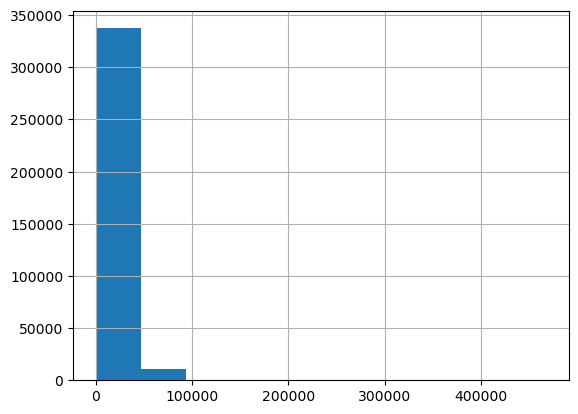

In [685]:
g4_gl['선별포인트'].hist();

#### 4등급 경유

In [605]:
g4_d.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade', '시군구명_수정', '1일평균주행거리',
       '조기폐차최종승인YN', '저감장치', '장치일련번호', '연간주행거리', '최신경과기간', '주행거리', '검사일자',
       '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량', '연간환경이익', '환경이익', '지원비용', '경제적타당성', '운행제한단속정보'],
      dtype='object')

In [606]:
g4_d.shape

(1153813, 63)

In [625]:
col = ['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용']

In [626]:
g4_d[col].dtypes

무부하매연측정치1    float64
주행거리         float64
최신경과기간       float64
운행제한단속정보     float64
지원비용         float64
dtype: object

In [627]:
g4_d['주행거리'] = g4_d['주행거리'].astype('float')

In [628]:
g4_d[col].isnull().sum()

무부하매연측정치1    31312
주행거리         22750
최신경과기간       62072
운행제한단속정보         0
지원비용          4557
dtype: int64

In [629]:
# nan 값 0으로 채우기
g4_d[col] = g4_d[col].fillna(0)
g4_d[col].isnull().sum()

무부하매연측정치1    0
주행거리         0
최신경과기간       0
운행제한단속정보     0
지원비용         0
dtype: int64

In [630]:
g4_d_corr = g4_d[col].corr()
g4_d_corr

,무부하매연측정치1,주행거리,최신경과기간,운행제한단속정보,지원비용
무부하매연측정치1,1.00000,0.02189,-0.00159,0.00287,-0.03765
주행거리,0.02189,1.00000,0.01222,0.01290,0.34048
최신경과기간,-0.00159,0.01222,1.00000,-0.00135,-0.05172
운행제한단속정보,0.00287,0.01290,-0.00135,1.00000,0.01218
지원비용,-0.03765,0.34048,-0.05172,0.01218,1.00000


In [631]:
g4_d_corr.sum()[col]

무부하매연측정치1   0.98553
주행거리        1.38750
최신경과기간      0.95756
운행제한단속정보    1.02660
지원비용        1.26329
dtype: float64

In [632]:
c1, c2, c3, c4, c5 = g4_d_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 + c5
w1, w2, w3, w4, w5 = c1/sc1, c2/sc1, c3/sc1, c4/sc1, c5/sc1
w1, w2, w3, w4, w5

(0.17534566687553824,
 0.24686492491677173,
 0.1703699836523275,
 0.1826534303823506,
 0.22476599417301196)

In [633]:
g4_d['선별포인트'] = w1 * g4_d['무부하매연측정치1'] + w2 * g4_d['주행거리'] + w3 * g4_d['최신경과기간'] + w4 * g4_d['운행제한단속정보'] + w5 * g4_d['지원비용']
g4_d['선별포인트'].isnull().sum()

0

In [634]:
g4_d.sort_values('선별포인트', ascending=False)[['차량번호', '차종', '선별포인트']].head()

,차량번호,차종,선별포인트
709519,경남82아9185,화물,2475430.48574
1048472,서울87아9950,화물,2475038.90952
870670,인천98바2249,특수,2309856.78473
1026463,강원98바2213,특수,2281161.53778
43105,22소6078,승용,2252922.39624


In [686]:
g4_d['선별포인트'].describe()

count   1153813.00000
mean      50343.54406
std       32915.78944
min           0.00000
25%       33342.80914
50%       45924.02873
75%       60737.41094
max     2475430.48574
Name: 선별포인트, dtype: float64

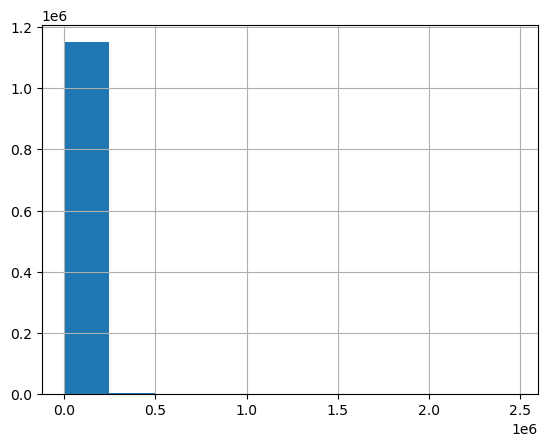

In [694]:
g4_d['선별포인트'].hist();

#### 5등급 연료별로 분리

In [646]:
gt5.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF', '운행제한단속정보'],
      dtype='object')

In [647]:
gt5['연료'].value_counts(dropna=False)

연료
경유             1125999
휘발유              30075
LPG(액화석유가스)        438
무동력                  5
CNG(압축천연가스)          5
알코올                  1
Name: count, dtype: int64

In [648]:
g5_gl = gt5.loc[(gt5['연료'] == '휘발유') | (gt5['연료'] == 'LPG(액화석유가스)')].reset_index(drop=True)
g5_gl.shape

(30513, 54)

In [649]:
g5_d = gt5.loc[gt5['연료'] == '경유'].reset_index(drop=True)
g5_d.shape

(1125999, 54)

#### 5등급 휘발유, LPG

In [650]:
g5_gl.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF', '운행제한단속정보'],
      dtype='object')

In [651]:
g5_gl.shape

(30513, 54)

In [652]:
col = ['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차', '지원비용_DPF']

In [653]:
g5_gl[col].dtypes

무부하매연측정치1    float64
무부하매연측정치2    float64
무부하매연측정치3    float64
주행거리          object
최신경과기간       float64
운행제한단속정보     float64
지원비용_조기폐차    float64
지원비용_DPF     float64
dtype: object

In [654]:
g5_gl['주행거리'] = g5_gl['주행거리'].astype('float')

In [655]:
g5_gl[col].isnull().sum()

무부하매연측정치1    30119
무부하매연측정치2    30122
무부하매연측정치3    30122
주행거리         30109
최신경과기간       30108
운행제한단속정보         0
지원비용_조기폐차    30513
지원비용_DPF     30513
dtype: int64

In [656]:
# nan 값 0으로 채우기
g5_gl[col] = g5_gl[col].fillna(0)
g5_gl[col].isnull().sum()

무부하매연측정치1    0
무부하매연측정치2    0
무부하매연측정치3    0
주행거리         0
최신경과기간       0
운행제한단속정보     0
지원비용_조기폐차    0
지원비용_DPF     0
dtype: int64

In [657]:
g5_gl_corr = g5_gl[col].corr()
g5_gl_corr

,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,주행거리,최신경과기간,운행제한단속정보,지원비용_조기폐차,지원비용_DPF
무부하매연측정치1,1.00000,0.51933,0.01154,0.35682,0.42965,NaN,NaN,NaN
무부하매연측정치2,0.51933,1.00000,0.03928,0.48293,0.54117,NaN,NaN,NaN
무부하매연측정치3,0.01154,0.03928,1.00000,0.14144,0.17294,NaN,NaN,NaN
주행거리,0.35682,0.48293,0.14144,1.00000,0.63082,NaN,NaN,NaN
최신경과기간,0.42965,0.54117,0.17294,0.63082,1.00000,NaN,NaN,NaN
운행제한단속정보,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지원비용_조기폐차,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
지원비용_DPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [658]:
g5_gl_corr.sum()[col]

무부하매연측정치1   2.31733
무부하매연측정치2   2.58271
무부하매연측정치3   1.36520
주행거리        2.61201
최신경과기간      2.77458
운행제한단속정보    0.00000
지원비용_조기폐차   0.00000
지원비용_DPF    0.00000
dtype: float64

In [659]:
c1, c2, c3, c4, c5, c6, c7, c8 = g5_gl_corr.sum()[col]
c6 += 1
c7 += 1
c8 += 1
sc1 = c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8
w1, w2, w3, w4, w5, w6, w7, w8 = c1/sc1, c2/sc1, c3/sc1, c4/sc1, c5/sc1, c6/sc1, c7/sc1, c8/sc1
w1, w2, w3, w4, w5, w6, w7, w8

(0.15815992095559206,
 0.17627200910555246,
 0.09317613199353551,
 0.1782718886900713,
 0.18936743411457607,
 0.0682508717135575,
 0.0682508717135575,
 0.0682508717135575)

In [660]:
c6, c7, c8

(1.0, 1.0, 1.0)

In [661]:
g5_gl['선별포인트'] = w1 * g5_gl['무부하매연측정치1'] + w2 * g5_gl['무부하매연측정치2'] + w3 * g5_gl['무부하매연측정치3'] + w4 * g5_gl['주행거리'] + w5 * g5_gl['최신경과기간'] + w6 * g5_gl['운행제한단속정보'] + w7 * g5_gl['지원비용_조기폐차'] + w8 * g5_gl['지원비용_DPF']
g5_gl['선별포인트'].isnull().sum()

0

In [663]:
g5_gl.sort_values('선별포인트', ascending=False)[['차량등록번호', '차종', '선별포인트']].head()

,차량등록번호,차종,선별포인트
97,96조3787,화물,301389.43872
186,부산8마7157,화물,160510.37412
238,서울34너5731,승용,134111.54159
16763,99저4802,특수,96457.67168
30363,02더1817,승용,89371.35494


In [688]:
g5_gl['선별포인트'].describe()

count    30513.00000
mean       334.32582
std       3888.55654
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max     301389.43872
Name: 선별포인트, dtype: float64

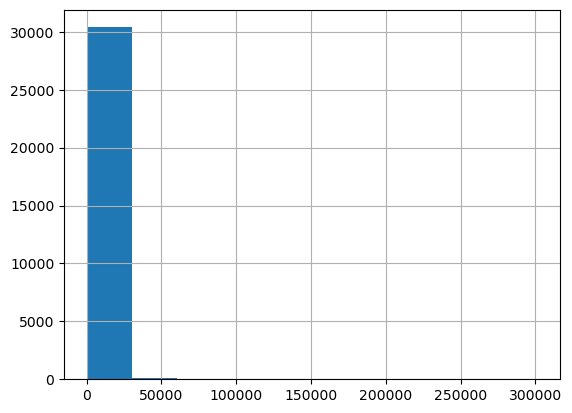

In [690]:
g5_gl['선별포인트'].hist();

#### 5등급 경유

In [664]:
g5_d.columns

Index(['차량등록번호', '본거지법정동코드', '차대번호', '제원관리번호', '배출가스인증번호', '배출가스등급', '용도',
       '차명', '차종', '차종유형', '연료', '배기량', '총중량', '차량연식', '조기폐차최종승인YN', '저감장치',
       '장치일련번호', '저감효율', '연간주행거리', '최신경과기간', '시도', '시구군', '1일평균주행거리', '주행거리',
       '검사일자', '검사방법', '검사종류', '검사판정', '무부하매연판정1', '무부하매연판정2', '무부하매연판정3',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '비상시및계절제단속발령건수', '비상시및계절제단속발령YN',
       '운행제한단속정보건수', '운행제한단속정보YN', '계절제1차단속YN', '계절제2차단속YN', '계절제3차단속YN',
       '비상시단속YN', '연간배출량_조기폐차', '연간배출량_DPF', '장치구분', '연간환경이익_조기폐차',
       '연간환경이익_DPF', '환경이익_조기폐차', '환경이익_DPF', '지원비용_조기폐차', '지원비용_DPF',
       '경제적타당성_조기폐차', '경제적타당성_DPF', '운행제한단속정보'],
      dtype='object')

In [665]:
g5_d.shape

(1125999, 54)

In [666]:
col = ['무부하매연측정치1', '주행거리', '최신경과기간', '운행제한단속정보', '지원비용_조기폐차', '지원비용_DPF']

In [667]:
g5_d[col].dtypes

무부하매연측정치1    float64
주행거리          object
최신경과기간       float64
운행제한단속정보     float64
지원비용_조기폐차    float64
지원비용_DPF     float64
dtype: object

In [668]:
g5_d['주행거리'] = g5_d['주행거리'].astype('float')

In [669]:
g5_d[col].isnull().sum()

무부하매연측정치1    362108
주행거리         355530
최신경과기간       355479
운행제한단속정보          0
지원비용_조기폐차         0
지원비용_DPF     907402
dtype: int64

In [670]:
# nan 값 0으로 채우기
g5_d[col] = g5_d[col].fillna(0)
g5_d[col].isnull().sum()

무부하매연측정치1    0
주행거리         0
최신경과기간       0
운행제한단속정보     0
지원비용_조기폐차    0
지원비용_DPF     0
dtype: int64

In [671]:
g5_d_corr = g5_d[col].corr()
g5_d_corr

,무부하매연측정치1,주행거리,최신경과기간,운행제한단속정보,지원비용_조기폐차,지원비용_DPF
무부하매연측정치1,1.00000,0.05739,0.31124,-0.02085,-0.03797,0.06009
주행거리,0.05739,1.00000,0.08341,0.02130,0.05735,0.02926
최신경과기간,0.31124,0.08341,1.00000,0.07183,-0.02379,0.07281
운행제한단속정보,-0.02085,0.02130,0.07183,1.00000,0.11668,-0.02102
지원비용_조기폐차,-0.03797,0.05735,-0.02379,0.11668,1.00000,0.02245
지원비용_DPF,0.06009,0.02926,0.07281,-0.02102,0.02245,1.00000


In [672]:
g5_d_corr.sum()[col]

무부하매연측정치1   1.36989
주행거리        1.24871
최신경과기간      1.51550
운행제한단속정보    1.16794
지원비용_조기폐차   1.13473
지원비용_DPF    1.16360
dtype: float64

In [674]:
c1, c2, c3, c4, c5, c6 = g5_d_corr.sum()[col]
sc1 = c1 + c2 + c3 + c4 + c5 + c6
w1, w2, w3, w4, w5, w6 = c1/sc1, c2/sc1, c3/sc1, c4/sc1, c5/sc1, c6/sc1
w1, w2, w3, w4, w5, w6

(0.1802405141002491,
 0.16429583669376746,
 0.19939784679454522,
 0.15366840609910873,
 0.14929936615671055,
 0.15309803015561899)

In [675]:
g5_d['선별포인트'] = w1 * g5_d['무부하매연측정치1'] + w2 * g5_d['주행거리'] + w3 * g5_d['최신경과기간'] + w4 * g5_d['운행제한단속정보'] + w5 * g5_d['지원비용_조기폐차'] + w6 * g5_d['지원비용_DPF']
g5_d['선별포인트'].isnull().sum()

0

In [676]:
g5_d.sort_values('선별포인트', ascending=False)[['차량등록번호', '차종', '선별포인트']].head()

,차량등록번호,차종,선별포인트
85099,05루9403,승합,131479087.81655
1008824,경기80바7162,화물,1572817.92759
584996,서울85바5177,화물,1464487.19449
54025,경기84바6979,화물,1402920.48403
955584,90더7549,화물,1382656.14766


In [691]:
g5_d['선별포인트'].describe()

count     1125999.00000
mean        27662.83253
std        127501.41355
min           447.89810
25%           656.91721
50%         25026.31992
75%         40055.60611
max     131479087.81655
Name: 선별포인트, dtype: float64

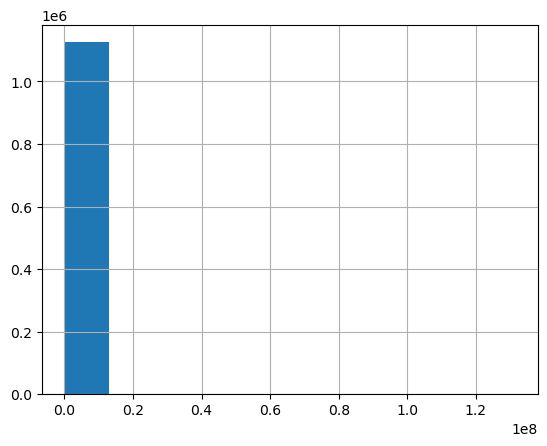

In [693]:
g5_d['선별포인트'].hist();

# code end